# Importando bibliotecas

In [1]:
import pandas as pd

# Funções

In [2]:
def create_nulls_dataframe(data):
    """
    Cria um DataFrame com a contagem de valores nulos para cada coluna de um DataFrame.

    Args:
        data (pd.DataFrame): O DataFrame a ser analisado.

    Returns:
        pd.DataFrame: DataFrame contendo as colunas 'features' e 'nulos', ordenado do maior para o menor número de nulos.
    """
    nulos_df = data.isnull().sum().reset_index()
    nulos_df.columns = ['features', 'nulos']
    nulos_df = nulos_df.sort_values(by='nulos', ascending=False).reset_index(drop=True)
    return nulos_df


# Carregar dataset

In [3]:
data = pd.read_csv('/Users/leticiapires/Desktop/AIDecision/merged_data.csv')
data.head()

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/2934989113.py:1: DtypeWarning: Columns (26,104,106,107) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/leticiapires/Desktop/AIDecision/merged_data.csv')


,id_vaga,titulo,modalidade,candidato_nome,candidato_codigo,situacao_candidado,data_candidatura,ultima_atualizacao,comentario,recrutador,...,cargo_atual_id_ibrati,cargo_atual_email_corporativo,cargo_atual_cargo_atual,cargo_atual_projeto_atual,cargo_atual_cliente,cargo_atual_unidade,cargo_atual_data_admissao,cargo_atual_data_ultima_promocao,cargo_atual_nome_superior_imediato,cargo_atual_email_superior_imediato
0,4530,CONSULTOR CONTROL M,NaN,José Vieira,25632.0,Encaminhado ao Requisitante,25-03-2021,25-03-2021,"Encaminhado para - PJ R$ 72,00/hora",Ana Lívia Moreira,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,CONSULTOR CONTROL M,NaN,Srta. Isabela Cavalcante,25529.0,Encaminhado ao Requisitante,22-03-2021,23-03-2021,"encaminhado para - R$ 6.000,00 – CLT Full , n...",Ana Lívia Moreira,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4531,2021-2607395-PeopleSoft Application Engine-Dom...,NaN,Sra. Yasmin Fernandes,25364.0,Contratado pela Decision,17-03-2021,12-04-2021,Data de Inicio: 12/04/2021,Juliana Cassiano,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4531,2021-2607395-PeopleSoft Application Engine-Dom...,NaN,Alexia Barbosa,25360.0,Encaminhado ao Requisitante,17-03-2021,17-03-2021,NaN,Juliana Cassiano,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56702 entries, 0 to 56701
Columns: 112 entries, id_vaga to cargo_atual_email_superior_imediato
dtypes: float64(20), int64(1), object(91)
memory usage: 48.5+ MB


In [5]:
# Verificar nulos nesse dataframe 
data.isnull().sum()

id_vaga                                    0
titulo                                  2943
modalidade                             55019
candidato_nome                          2943
candidato_codigo                        2943
                                       ...  
cargo_atual_unidade                    56642
cargo_atual_data_admissao              55806
cargo_atual_data_ultima_promocao       55806
cargo_atual_nome_superior_imediato     56702
cargo_atual_email_superior_imediato    56702
Length: 112, dtype: int64

As colunas com cargo_atual parecem ter bastante nulos, vamos investigar pra entender melhor se mantemos.

In [6]:
# Verificar quantos não nulos tem nas colunas que iniciam com cargo_atual
lista_cargo_atual = data.columns[data.columns.str.startswith('cargo_atual')].to_list()
lista_cargo_atual

['cargo_atual_id_ibrati',
 'cargo_atual_email_corporativo',
 'cargo_atual_cargo_atual',
 'cargo_atual_projeto_atual',
 'cargo_atual_cliente',
 'cargo_atual_unidade',
 'cargo_atual_data_admissao',
 'cargo_atual_data_ultima_promocao',
 'cargo_atual_nome_superior_imediato',
 'cargo_atual_email_superior_imediato']

In [7]:
# E número de não nulos em cada coluna
data[data.columns[data.columns.str.startswith('cargo_atual')]].notnull().sum()

cargo_atual_id_ibrati                   59
cargo_atual_email_corporativo            0
cargo_atual_cargo_atual                 60
cargo_atual_projeto_atual                0
cargo_atual_cliente                     60
cargo_atual_unidade                     60
cargo_atual_data_admissao              896
cargo_atual_data_ultima_promocao       896
cargo_atual_nome_superior_imediato       0
cargo_atual_email_superior_imediato      0
dtype: int64

Vamos remover inicialmente essas features e testar um modelo sem elas pra entender primeiro. já que são poucos dados.

In [8]:
# Remover colunas que não são relevantes para o modelo
data.drop(columns=lista_cargo_atual, inplace=True)
data

,id_vaga,titulo,modalidade,candidato_nome,candidato_codigo,situacao_candidado,data_candidatura,ultima_atualizacao,comentario,recrutador,...,formacao_e_idiomas_outro_idioma,cv_pt,cv_en,formacao_e_idiomas_instituicao_ensino_superior,formacao_e_idiomas_cursos,formacao_e_idiomas_ano_conclusao,informacoes_pessoais_download_cv,informacoes_profissionais_qualificacoes,informacoes_profissionais_experiencias,formacao_e_idiomas_outro_curso
0,4530,CONSULTOR CONTROL M,NaN,José Vieira,25632.0,Encaminhado ao Requisitante,25-03-2021,25-03-2021,"Encaminhado para - PJ R$ 72,00/hora",Ana Lívia Moreira,...,-,\ndados pessoais\nestado civil: casado\nidade:...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,CONSULTOR CONTROL M,NaN,Srta. Isabela Cavalcante,25529.0,Encaminhado ao Requisitante,22-03-2021,23-03-2021,"encaminhado para - R$ 6.000,00 – CLT Full , n...",Ana Lívia Moreira,...,-,"solteiro, 47 anos\n\nestrada meringuava, nº 17...",NaN,NaN,NaN,2020.0,NaN,NaN,NaN,NaN
2,4531,2021-2607395-PeopleSoft Application Engine-Dom...,NaN,Sra. Yasmin Fernandes,25364.0,Contratado pela Decision,17-03-2021,12-04-2021,Data de Inicio: 12/04/2021,Juliana Cassiano,...,-,\n\nárea de atuação: lider de consultoria / ge...,NaN,NaN,Tecnologia da Informação,1995.0,NaN,NaN,NaN,NaN
3,4531,2021-2607395-PeopleSoft Application Engine-Dom...,NaN,Alexia Barbosa,25360.0,Encaminhado ao Requisitante,17-03-2021,17-03-2021,NaN,Juliana Cassiano,...,-,informações pessoais\n estado civil: casado\n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56697,14219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56698,14220,Consultor Sênior Especialista SAP LES-TRA - 1433,NaN,Ana Cardoso,16828.0,Desistiu,26-02-2025,28-02-2025,Recebeu a confirmação de outro processo seleti...,Elisa Nunes,...,-,"brasileiro, solteiro, 40 anos\njardim presiden...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56699,14220,Consultor Sênior Especialista SAP LES-TRA - 1433,NaN,Pedro Lucas das Neves,15042.0,Encaminhado ao Requisitante,28-02-2025,28-02-2025,NaN,Elisa Nunes,...,-,\nformação principal\npós graduação em adminis...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56700,14221,Consultor Sênior Oracle EPM FCCS - 1434,NaN,Maria Eduarda Cassiano,49190.0,Prospect,26-02-2025,26-02-2025,NaN,Luna Correia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
nulos_df = create_nulls_dataframe(data)
nulos_df

,features,nulos
0,informacoes_pessoais_url_linkedin,56702
1,informacoes_pessoais_facebook,56702
2,informacoes_profissionais_experiencias,56702
3,informacoes_profissionais_qualificacoes,56702
4,infos_basicas_telefone_recado,56702
...,...,...
97,informacoes_basicas_analista_responsavel,164
98,perfil_vaga_nivel profissional,164
99,perfil_vaga_faixa_etaria,164
100,perfil_vaga_local_trabalho,164


Pode-se perceber que as primeiras features da tabela `nulos_df` vem tudo zerada, então vamos remover essas colunas do dataframe.

In [10]:
# Identificar as colunas com 56702 valores nulos
colunas_para_remover = nulos_df[nulos_df['nulos'] == 56702]['features'].tolist()

# Remover essas colunas do DataFrame principal
data.drop(columns=colunas_para_remover, inplace=True)

# Verificar o resultado
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56702 entries, 0 to 56701
Data columns (total 92 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   id_vaga                                               56702 non-null  int64  
 1   titulo                                                53759 non-null  object 
 2   modalidade                                            1683 non-null   object 
 3   candidato_nome                                        53759 non-null  object 
 4   candidato_codigo                                      53759 non-null  float64
 5   situacao_candidado                                    53759 non-null  object 
 6   data_candidatura                                      53759 non-null  object 
 7   ultima_atualizacao                                    49846 non-null  object 
 8   comentario                                            14

In [11]:
nulos_df = create_nulls_dataframe(data)
nulos_df

,features,nulos
0,informacoes_basicas_telefone,56699
1,beneficios_valor_compra_2,56527
2,informacoes_profissionais_nivel_profissional,56409
3,informacoes_basicas_nome,55919
4,perfil_vaga_horario_trabalho,55894
...,...,...
87,informacoes_basicas_cliente,164
88,beneficios_valor_venda,164
89,informacoes_basicas_solicitante_cliente,164
90,informacoes_basicas_empresa_divisao,164


# Analisando a coluna TARGET do modelo - `situacao_candidado`

In [12]:
# Renomear a coluna situacao_candidado para situacao_candidato
data.rename(columns={'situacao_candidado': 'situacao_candidato'}, inplace=True)


In [13]:
# Verificar valores únicos da coluna situacao_candidato
data['situacao_candidato'].unique()

array(['Encaminhado ao Requisitante', 'Contratado pela Decision', nan,
       'Desistiu', 'Documentação PJ', 'Não Aprovado pelo Cliente',
       'Prospect', 'Não Aprovado pelo RH', 'Aprovado',
       'Não Aprovado pelo Requisitante', 'Inscrito', 'Entrevista Técnica',
       'Em avaliação pelo RH', 'Contratado como Hunting',
       'Desistiu da Contratação', 'Entrevista com Cliente',
       'Documentação CLT', 'Recusado', 'Documentação Cooperado',
       'Sem interesse nesta vaga', 'Encaminhar Proposta',
       'Proposta Aceita'], dtype=object)

In [14]:
# Verificar quantos tem de cada categoria
data['situacao_candidato'].value_counts()

situacao_candidato
Prospect                          20021
Encaminhado ao Requisitante       16122
Inscrito                           3980
Não Aprovado pelo Cliente          3492
Contratado pela Decision           2758
Desistiu                           2349
Não Aprovado pelo RH               1765
Não Aprovado pelo Requisitante      765
Entrevista Técnica                  579
Sem interesse nesta vaga            576
Entrevista com Cliente              469
Em avaliação pelo RH                375
Contratado como Hunting             226
Aprovado                            209
Desistiu da Contratação              59
Documentação PJ                       4
Documentação CLT                      3
Recusado                              2
Documentação Cooperado                2
Encaminhar Proposta                   2
Proposta Aceita                       1
Name: count, dtype: int64

In [15]:
# Verificar se um mesmo id de candidato pode estar associado a mais de uma situação
data['id_candidato'].value_counts()

id_candidato
833.0      73
1677.0     70
12450.0    54
27660.0    53
16747.0    45
           ..
38200.0     1
38171.0     1
38169.0     1
37967.0     1
30478.0     1
Name: count, Length: 23463, dtype: int64

In [16]:
# Verificar se um mesmo id_candidato está associado a mais de uma situacao_candidato
# ids_multiplas_situacoes = data.groupby('id_candidato', 'id_vaga')['situacao_candidado'].nunique()

# Agrupar por id_candidato e id_vaga, contando o número de situações únicas
ids_multiplas_situacoes = data.groupby('id_candidato')['situacao_candidato'].nunique()
ids_multiplas_situacoes
# # Filtrar apenas os IDs com mais de uma situação
# ids_multiplas_situacoes = ids_multiplas_situacoes[ids_multiplas_situacoes > 1]

# # Exibir os resultados
# ids_multiplas_situacoes

id_candidato
3.0        1
10.0       2
15.0       4
18.0       1
23.0       2
          ..
47117.0    1
47118.0    1
47119.0    1
47122.0    1
47123.0    1
Name: situacao_candidato, Length: 23463, dtype: int64

In [ ]:
data[data['id_candidato'] == 15.0]

In [18]:
sample = data[['ultima_atualizacao','comentario', 'id_candidato', 'situacao_candidato']]
sample.head(10)

,ultima_atualizacao,comentario,id_candidato,situacao_candidato
0,25-03-2021,"Encaminhado para - PJ R$ 72,00/hora",25632.0,Encaminhado ao Requisitante
1,23-03-2021,"encaminhado para - R$ 6.000,00 – CLT Full , n...",25529.0,Encaminhado ao Requisitante
2,12-04-2021,Data de Inicio: 12/04/2021,25364.0,Contratado pela Decision
3,17-03-2021,NaN,25360.0,Encaminhado ao Requisitante
4,NaN,NaN,NaN,NaN
5,18-05-2021,NaN,26338.0,Contratado pela Decision
6,27-04-2021,Profissional desistiu da vaga. Motivo : Na ver...,24645.0,Desistiu
7,11-05-2021,Aguardando confirmação de inicio _,26361.0,Documentação PJ
8,30-04-2021,"profissional não atende ou responde ligações, ...",26205.0,Desistiu
9,16-04-2021,"""Conversando com a candidata, foi exposto que ...",26003.0,Não Aprovado pelo Cliente


Não possui itens duplicados. Possui mais de um candidato com aplicação, mas são aplicações pra vagas diferentes. O que leva a entender que o recrutador apenas atualiza a situação do candidato, sem criar um novo registro.

In [19]:
mapa_match = {
    # Match (1)
    'Contratado pela Decision': 1,
    'Contratado como Hunting': 1,

    # Não Match (0)
    'Não Aprovado pelo Cliente': 0,
    'Não Aprovado pelo RH': 0,
    'Não Aprovado pelo Requisitante': 0,
    'Desistiu': 0,
    'Desistiu da Contratação': 0,
    'Sem interesse nesta vaga': 0,
    'Recusado': 0,
}

# Aplica o mapeamento, valores não mapeados ficarão como NaN
data['match'] = data['situacao_candidato'].map(mapa_match)
data.head()

,id_vaga,titulo,modalidade,candidato_nome,candidato_codigo,situacao_candidato,data_candidatura,ultima_atualizacao,comentario,recrutador,...,formacao_e_idiomas_nivel_ingles,formacao_e_idiomas_nivel_espanhol,formacao_e_idiomas_outro_idioma,cv_pt,formacao_e_idiomas_instituicao_ensino_superior,formacao_e_idiomas_cursos,formacao_e_idiomas_ano_conclusao,informacoes_pessoais_download_cv,formacao_e_idiomas_outro_curso,match
0,4530,CONSULTOR CONTROL M,NaN,José Vieira,25632.0,Encaminhado ao Requisitante,25-03-2021,25-03-2021,"Encaminhado para - PJ R$ 72,00/hora",Ana Lívia Moreira,...,NaN,NaN,-,\ndados pessoais\nestado civil: casado\nidade:...,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,CONSULTOR CONTROL M,NaN,Srta. Isabela Cavalcante,25529.0,Encaminhado ao Requisitante,22-03-2021,23-03-2021,"encaminhado para - R$ 6.000,00 – CLT Full , n...",Ana Lívia Moreira,...,Intermediário,Básico,-,"solteiro, 47 anos\n\nestrada meringuava, nº 17...",NaN,NaN,2020.0,NaN,NaN,NaN
2,4531,2021-2607395-PeopleSoft Application Engine-Dom...,NaN,Sra. Yasmin Fernandes,25364.0,Contratado pela Decision,17-03-2021,12-04-2021,Data de Inicio: 12/04/2021,Juliana Cassiano,...,Avançado,Intermediário,-,\n\nárea de atuação: lider de consultoria / ge...,NaN,Tecnologia da Informação,1995.0,NaN,NaN,1.0
3,4531,2021-2607395-PeopleSoft Application Engine-Dom...,NaN,Alexia Barbosa,25360.0,Encaminhado ao Requisitante,17-03-2021,17-03-2021,NaN,Juliana Cassiano,...,NaN,NaN,-,informações pessoais\n estado civil: casado\n...,NaN,NaN,NaN,NaN,NaN,NaN
4,4532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_abertos = data[data['match'].isna()]
df_abertos.head()

In [ ]:
data = data.dropna(subset=['match'])
data.head()

# Mantendo somente o que tem o match definido.

In [23]:
nulos_df = create_nulls_dataframe(data)
nulos_df

,features,nulos
0,informacoes_basicas_telefone,11991
1,informacoes_profissionais_nivel_profissional,11916
2,beneficios_valor_compra_2,11912
3,formacao_e_idiomas_instituicao_ensino_superior,11821
4,perfil_vaga_outro_idioma,11810
...,...,...
88,data_candidatura,0
89,situacao_candidato,0
90,candidato_codigo,0
91,candidato_nome,0


# Removendo colunas não importantes

In [24]:
# Remover coluna candidato_nome, que não é importante pro modelo
data.drop(columns=['candidato_nome'], inplace=True)

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/4172204936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['candidato_nome'], inplace=True)


In [25]:
# Remover coluna data_candidatura, que não é importante pro modelo
data.drop(columns=['data_candidatura'], inplace=True)

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/3062253567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['data_candidatura'], inplace=True)


In [26]:
# Remover coluna ultima_atualizacao, que não é importante pro modelo
data.drop(columns=['ultima_atualizacao'], inplace=True)

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/3246579253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['ultima_atualizacao'], inplace=True)


In [27]:
data['recrutador']

2        Juliana Cassiano
5           Stella Vieira
6          Yasmin da Rosa
8             Ana Camargo
9         Carolina Araújo
               ...       
56582       Laura Pacheco
56597       Laura Pacheco
56616         Elisa Nunes
56684         Elisa Nunes
56698         Elisa Nunes
Name: recrutador, Length: 11992, dtype: object

In [28]:
# Remover coluna recrutador, que não é importante pro modelo
data.drop(columns=['recrutador'], inplace=True)

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/198888701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['recrutador'], inplace=True)


In [29]:
# Remover coluna infos_basicas_data_criacao, que não é importante pro modelo
data.drop(columns=['infos_basicas_data_criacao'], inplace=True)

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/2988529905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['infos_basicas_data_criacao'], inplace=True)


In [30]:
data['infos_basicas_inserido_por']

2            Juliana Cassiano
5               Stella Vieira
6                 Ana Camargo
8                 Ana Camargo
9           Agatha Montenegro
                 ...         
56582           Paulo Peixoto
56597           Laura Pacheco
56616              Eloah Leão
56684    Srta. Bella Ferreira
56698             Dr. Luan Sá
Name: infos_basicas_inserido_por, Length: 11992, dtype: object

In [31]:
# Remover coluna infos_basicas_inserido_por, que não é importante pro modelo
data.drop(columns=['infos_basicas_inserido_por'], inplace=True)

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/927267872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['infos_basicas_inserido_por'], inplace=True)


In [32]:
# Remover infos_basicas_email, que não é importante pro modelo
data.drop(columns=['infos_basicas_email'], inplace=True)


/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/304899727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['infos_basicas_email'], inplace=True)


In [33]:
# Remover infos_basicas_data_atualizacao, que não é importante pro modelo
data.drop(columns=['infos_basicas_data_atualizacao'], inplace=True)

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/2374775817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['infos_basicas_data_atualizacao'], inplace=True)


In [34]:
# Remover infos_basicas_nome, que não é importante pro modelo
data.drop(columns=['infos_basicas_nome'], inplace=True)

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/2958842115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['infos_basicas_nome'], inplace=True)


In [35]:
# Remover informacoes_pessoais_nome, que não é importante pro modelo
data.drop(columns=['informacoes_pessoais_nome'], inplace=True)

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/607495112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['informacoes_pessoais_nome'], inplace=True)


In [36]:
# Remover informacoes_pessoais_email, que não é importante pro modelo
data.drop(columns=['informacoes_pessoais_email'], inplace=True)

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/1364438691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['informacoes_pessoais_email'], inplace=True)


In [37]:
# Remover informacoes_pessoais_telefone_celular, que não é importante pro modelo
data.drop(columns=['informacoes_pessoais_telefone_celular'], inplace=True)

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/806788124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['informacoes_pessoais_telefone_celular'], inplace=True)


In [38]:
# Remover informacoes_pessoais_endereco, que não é importante pro modelo
data.drop(columns=['informacoes_pessoais_endereco'], inplace=True)

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/2910910947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['informacoes_pessoais_endereco'], inplace=True)


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11992 entries, 2 to 56698
Data columns (total 80 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   id_vaga                                               11992 non-null  int64  
 1   titulo                                                11992 non-null  object 
 2   modalidade                                            1042 non-null   object 
 3   candidato_codigo                                      11992 non-null  float64
 4   situacao_candidato                                    11992 non-null  object 
 5   comentario                                            8477 non-null   object 
 6   informacoes_basicas_data_requicisao                   11988 non-null  object 
 7   informacoes_basicas_limite_esperado_para_contratacao  11988 non-null  object 
 8   informacoes_basicas_titulo_vaga                       11988 n

In [40]:
# Remover infos_basicas_telefone 
data.drop(columns=['infos_basicas_telefone'], inplace=True)

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/878224484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['infos_basicas_telefone'], inplace=True)


In [41]:
# Remover informacoes_basicas_data_requicisao
data.drop(columns=['informacoes_basicas_data_requicisao'], inplace=True)

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/3760562061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['informacoes_basicas_data_requicisao'], inplace=True)


In [42]:
# Remover informacoes_basicas_data_inicial
data.drop(columns=['informacoes_basicas_data_inicial'], inplace=True)

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/156035742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['informacoes_basicas_data_inicial'], inplace=True)


In [43]:
# Remover informacoes_basicas_data_final
data.drop(columns=['informacoes_basicas_data_final'], inplace=True)

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/814285801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['informacoes_basicas_data_final'], inplace=True)


In [44]:
# Remover informacoes_pessoais_data_aceite
data.drop(columns=['informacoes_pessoais_data_aceite'], inplace=True)

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/676492722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['informacoes_pessoais_data_aceite'], inplace=True)


In [45]:
# Remover informacoes_basicas_telefone
data.drop(columns=['informacoes_basicas_telefone'], inplace=True)

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/2346235234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['informacoes_basicas_telefone'], inplace=True)


In [46]:
# Remover informacoes_basicas_requisitante
data.drop(columns=['informacoes_basicas_requisitante'], inplace=True)

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/1242126899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['informacoes_basicas_requisitante'], inplace=True)


In [47]:
# Remover informacoes_basicas_analista_responsavel
data.drop(columns=['informacoes_basicas_analista_responsavel'], inplace=True)

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/1727007193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['informacoes_basicas_analista_responsavel'], inplace=True)


# Continuando análise de nulos

In [48]:
# Mostra todas as linhas e colunas do DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [49]:
nulos_df = create_nulls_dataframe(data)
nulos_df

,features,nulos
0,informacoes_profissionais_nivel_profissional,11916
1,beneficios_valor_compra_2,11912
2,formacao_e_idiomas_instituicao_ensino_superior,11821
3,perfil_vaga_outro_idioma,11810
4,informacoes_profissionais_certificacoes,11741
5,perfil_vaga_horario_trabalho,11718
6,informacoes_basicas_nome,11687
7,informacoes_profissionais_outras_certificacoes,11663
8,formacao_e_idiomas_outro_curso,11570
9,informacoes_basicas_nome_substituto,11392


In [50]:
data['informacoes_profissionais_nivel_profissional'].unique()

array([nan, 'Pleno', 'Sênior', 'Analista', 'Especialista', 'Júnior',
       'Estagiário', 'Técnico de Nível Médio', 'Líder'], dtype=object)

In [51]:
# Considerar como Não informado os que estão Nan
data['informacoes_profissionais_nivel_profissional'].fillna('Não informado', inplace=True)

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/1046926432.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['informacoes_profissionais_nivel_profissional'].fillna('Não informado', inplace=True)
/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/1046926432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [52]:
nulos_df = create_nulls_dataframe(data)
nulos_df

,features,nulos
0,beneficios_valor_compra_2,11912
1,formacao_e_idiomas_instituicao_ensino_superior,11821
2,perfil_vaga_outro_idioma,11810
3,informacoes_profissionais_certificacoes,11741
4,perfil_vaga_horario_trabalho,11718
5,informacoes_basicas_nome,11687
6,informacoes_profissionais_outras_certificacoes,11663
7,formacao_e_idiomas_outro_curso,11570
8,informacoes_basicas_nome_substituto,11392
9,informacoes_pessoais_download_cv,10998


In [53]:
# Remover beneficios_valor_compra_2 , tem muitos nulos e acho que não é relevante
data.drop(columns=['beneficios_valor_compra_2'], inplace=True)


/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/1289786240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['beneficios_valor_compra_2'], inplace=True)


In [54]:
# Colocar Nan como Não informado coluna formacao_e_idiomas_instituicao_ensino_superior
data['formacao_e_idiomas_instituicao_ensino_superior'].fillna('Não informado', inplace=True)

#PROXIMA ETAPA (SEM PRIORIDADE) - AJUSTAR PRA PADORNIZAR OS NOMES - TENTAR UM MODELO DESSA FORMA MESMO


/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/3032011597.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['formacao_e_idiomas_instituicao_ensino_superior'].fillna('Não informado', inplace=True)
/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/3032011597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [55]:
# Colocar nan como Nenhum para perfil_vaga_outro_idioma
data['perfil_vaga_outro_idioma'].fillna('Nenhum', inplace=True)

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/2028395109.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['perfil_vaga_outro_idioma'].fillna('Nenhum', inplace=True)
/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/2028395109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['perfil_vaga_outro_i

In [56]:
data['informacoes_profissionais_certificacoes'].unique()

array([nan, 'PMP - Project Management Professional',
       'ITIL v3 - IT Infraestructure Library',
       'MS [98-361] Visual Studio Software Development Fundamentals, MS [70-488] Developing Microsoft SharePoint Server 2013 Core Solutions, MS [70-432] Microsoft SQL Server 2008, Implementation and Maintenance',
       'SAP Foundations, SAP MM, SAP SD',
       'Agile Product Lifecycle Management 9 Certified Implementation Specialist',
       'MS [70-410] Installing and Configuring Windows Server 2012',
       'ITIL v2 - IT Infraestructure Library', 'COBIT - Governança de TI',
       'SAP FI/CO', 'SAP SD, SAP SEM',
       'SAP TM, SAP SD, SAP PMO, SAP Hana, SAP Basis, SAP ABAP Foundaition, Primavera Portfolio Management Certified Implementation Specialist, PMP - Project Management Professional',
       'ITIL v3 - IT Infraestructure Library, COBIT - Governança de TI',
       'SAP MM, MS [77-422] MOS: Microsoft Office PowerPoint 2013, MS [77-418] MOS: Microsoft Office Word 2013, MS [77-420

In [57]:
# Substitua Nan por nenhum - informacoes_profissionais_certificacoes
data['informacoes_profissionais_certificacoes'].fillna('Nenhum', inplace=True)

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/352907651.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['informacoes_profissionais_certificacoes'].fillna('Nenhum', inplace=True)
/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/352907651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['inform

In [58]:
# Criar nova coluna a partir da coluna informacoes_profissionais_certificacoes, se o campo tiver vazio/nan, significa que não tem certificação
data['possui_certificacao'] = data['informacoes_profissionais_certificacoes'].apply(
    lambda x: 'Não' if pd.isna(x) or str(x).strip() == '' else 'Sim'
)


/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/3571117128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['possui_certificacao'] = data['informacoes_profissionais_certificacoes'].apply(


In [59]:
data.head()

,id_vaga,titulo,modalidade,candidato_codigo,situacao_candidato,comentario,informacoes_basicas_limite_esperado_para_contratacao,informacoes_basicas_titulo_vaga,informacoes_basicas_vaga_sap,informacoes_basicas_cliente,informacoes_basicas_solicitante_cliente,informacoes_basicas_empresa_divisao,informacoes_basicas_tipo_contratacao,informacoes_basicas_prazo_contratacao,informacoes_basicas_objetivo_vaga,informacoes_basicas_prioridade_vaga,informacoes_basicas_origem_vaga,informacoes_basicas_superior_imediato,informacoes_basicas_nome,perfil_vaga_pais,perfil_vaga_estado,perfil_vaga_cidade,perfil_vaga_bairro,perfil_vaga_regiao,perfil_vaga_local_trabalho,perfil_vaga_vaga_especifica_para_pcd,perfil_vaga_faixa_etaria,perfil_vaga_horario_trabalho,perfil_vaga_nivel profissional,perfil_vaga_nivel_academico,perfil_vaga_nivel_ingles,perfil_vaga_nivel_espanhol,perfil_vaga_outro_idioma,perfil_vaga_areas_atuacao,perfil_vaga_principais_atividades,perfil_vaga_competencia_tecnicas_e_comportamentais,perfil_vaga_demais_observacoes,perfil_vaga_viagens_requeridas,perfil_vaga_equipamentos_necessarios,beneficios_valor_venda,beneficios_valor_compra_1,perfil_vaga_habilidades_comportamentais_necessarias,informacoes_basicas_nome_substituto,id_candidato,infos_basicas_objetivo_profissional,infos_basicas_local,infos_basicas_sabendo_de_nos_por,infos_basicas_codigo_profissional,informacoes_pessoais_fonte_indicacao,informacoes_pessoais_data_nascimento,informacoes_pessoais_sexo,informacoes_pessoais_estado_civil,informacoes_pessoais_pcd,informacoes_profissionais_titulo_profissional,informacoes_profissionais_area_atuacao,informacoes_profissionais_conhecimentos_tecnicos,informacoes_profissionais_certificacoes,informacoes_profissionais_outras_certificacoes,informacoes_profissionais_remuneracao,informacoes_profissionais_nivel_profissional,formacao_e_idiomas_nivel_academico,formacao_e_idiomas_nivel_ingles,formacao_e_idiomas_nivel_espanhol,formacao_e_idiomas_outro_idioma,cv_pt,formacao_e_idiomas_instituicao_ensino_superior,formacao_e_idiomas_cursos,formacao_e_idiomas_ano_conclusao,informacoes_pessoais_download_cv,formacao_e_idiomas_outro_curso,match,possui_certificacao
2,4531,2021-2607395-PeopleSoft Application Engine-Dom...,NaN,25364.0,Contratado pela Decision,Data de Inicio: 12/04/2021,00-00-0000,2021-2607395-PeopleSoft Application Engine-Dom...,Não,Gonzalez and Sons,Valentim Duarte,Decision São Paulo,PJ/Autônomo,NaN,Contratação,Média: Média complexidade 6 a 10 dias,Nova Posição,Superior Imediato:,NaN,Brasil,São Paulo,São Paulo,NaN,NaN,2000.0,Não,De: Até:,NaN,Sênior,Ensino Médio Completo,Nenhum,Nenhum,Nenhum,Gestão e Alocação de Recursos de TI-,Key skills required for the job are:\n\nPeople...,O recurso Peoplesoft tem como responsabilidade...,"Remoto DEPOIS PRESENCIAL, TEMPO INDETERMINADO",NaN,Notebook padrão -,-,hora,NaN,NaN,25364.0,Liderança / Desenvolvimento,"São Paulo, São Paulo",Site de Empregos,25364.0,Site de Empregos: APINFO / Linkedin,31-01-1973,Masculino,Casado,Não,Liderança / Desenvolvimento,TI - Projetos,"- PeopleSoft (PeopleTools 8.49, 8.53, 8.55, 8....",Nenhum,- Capacitação PeopleSoft (Formação Técnica) – ...,15.000 - Mensal PJ,Não informado,Ensino Superior Completo,Avançado,Intermediário,-,\n\nárea de atuação: lider de consultoria / ge...,Não informado,Tecnologia da Informação,1995.0,NaN,NaN,1.0,Sim
5,4533,2021-2605708-Microfocus Application Life Cycle...,NaN,26338.0,Contratado pela Decision,NaN,01-01-1970,2021-2605708-Microfocus Application Life Cycle...,Não,Barnes-Woods,Maysa Andrade,Decision São Paulo,PJ/Autônomo,NaN,Contratação,Média: Média complexidade 6 a 10 dias,Nova Posição,Superior Imediato:,NaN,Brasil,São Paulo,São Paulo,NaN,NaN,2000.0,Não,De: Até:,NaN,Sênior,Ensino Médio Completo,Técnico,Fluente,Nenhum,Gestão e Alocação de Recursos de TI-,Arquiteto\n\nFoco na área e automação.\n\nRequ...,Arquiteto\n\nFoco na área e automação.\n\nRequ...,Atuação somente em horário comercial. Tempo in...,NaN,NaN,"207,00 -",hora,Telefonica,NaN,26338.0,NaN,NaN,NaN,26

In [60]:
nulos_df = create_nulls_dataframe(data)
nulos_df

,features,nulos
0,perfil_vaga_horario_trabalho,11718
1,informacoes_basicas_nome,11687
2,informacoes_profissionais_outras_certificacoes,11663
3,formacao_e_idiomas_outro_curso,11570
4,informacoes_basicas_nome_substituto,11392
5,informacoes_pessoais_download_cv,10998
6,modalidade,10950
7,informacoes_profissionais_conhecimentos_tecnicos,10903
8,perfil_vaga_bairro,10834
9,perfil_vaga_regiao,10805


In [61]:
data['perfil_vaga_horario_trabalho'].unique()

array([nan, 'Comercial',
       'Vaga para cobertura de licença maternidade, em tor', '9 AS 18',
       '9/18 14/22', '9/18', '6x1 / madrugada 5x2', 'comercial',
       'Horario comercial', '9 as 18', '09:00 as 18:00',
       'Vide descrição da vaga', '8/17',
       '08:30 às 12:30 hrs / 14:00 às 18:00 hrs', '09 horas as 18 horas',
       'Comercial - 09h às 18h segunda a sexta', '09h as 187h',
       'hibrido 3 x por semana na Franciso Matarazzo proxi', '9 às 18 hs',
       'Das 9 às 18hs', 'das *9 as 18hs', 'DAS 09:00 AS 18:00',
       '9h as 18h', '02 vagas - Das 09h às 18h e das 10 às 19h'],
      dtype=object)

In [62]:
# Remover perfil_vaga_horario_trabalho, não é relevante
data.drop(columns=['perfil_vaga_horario_trabalho'], inplace=True)

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/4006715174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['perfil_vaga_horario_trabalho'], inplace=True)


In [63]:
nulos_df = create_nulls_dataframe(data)
nulos_df

,features,nulos
0,informacoes_basicas_nome,11687
1,informacoes_profissionais_outras_certificacoes,11663
2,formacao_e_idiomas_outro_curso,11570
3,informacoes_basicas_nome_substituto,11392
4,informacoes_pessoais_download_cv,10998
5,modalidade,10950
6,informacoes_profissionais_conhecimentos_tecnicos,10903
7,perfil_vaga_bairro,10834
8,perfil_vaga_regiao,10805
9,formacao_e_idiomas_cursos,10143


In [64]:
# Remover informacoes_basicas_nome,informacoes_basicas_nome_substituto,  perfil_vaga_bairro, perfil_vaga_regiao, informacoes_pessoais_pcd, informacoes_pessoais_estado_civil, informacoes_pessoais_sexo

data.drop(columns=['informacoes_basicas_nome', 'informacoes_basicas_nome_substituto', 'perfil_vaga_bairro', 'perfil_vaga_regiao', 'informacoes_pessoais_pcd', 'informacoes_pessoais_estado_civil', 'informacoes_pessoais_sexo'], inplace=True)

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/1590965007.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['informacoes_basicas_nome', 'informacoes_basicas_nome_substituto', 'perfil_vaga_bairro', 'perfil_vaga_regiao', 'informacoes_pessoais_pcd', 'informacoes_pessoais_estado_civil', 'informacoes_pessoais_sexo'], inplace=True)


In [65]:
nulos_df = create_nulls_dataframe(data)
nulos_df.head(10)

,features,nulos
0,informacoes_profissionais_outras_certificacoes,11663
1,formacao_e_idiomas_outro_curso,11570
2,informacoes_pessoais_download_cv,10998
3,modalidade,10950
4,informacoes_profissionais_conhecimentos_tecnicos,10903
5,formacao_e_idiomas_cursos,10143
6,formacao_e_idiomas_ano_conclusao,9938
7,formacao_e_idiomas_nivel_espanhol,9932
8,informacoes_profissionais_area_atuacao,9931
9,formacao_e_idiomas_nivel_ingles,9858


In [66]:
data['informacoes_pessoais_download_cv'].unique()

array([nan, '32142.doc', '33028.pdf', '32342.pdf', '32340.pdf',
       '32319.pdf', '32265.pdf', '31985.doc', '31946.pdf', '32117.pdf',
       '32116.pdf', '32145.pdf', '32169.docx', '32162.pdf', '33141.pdf',
       '33000.docx', '32203.doc', '23830.pdf', '33239.pdf', '33066.pdf',
       '32308.pdf', '33155.pdf', '33672.pdf', '33606.pdf', '33468.pdf',
       '33453.pdf', '33438.pdf', '33653.docx', '33163.pdf', '27200.pdf',
       '33015.docx', '32095.pdf', '33870.pdf', '33868.pdf', '33941.pdf',
       '33926.pdf', '33175.pdf', '33681.docx', '33654.pdf', '33652.docx',
       '33651.pdf', '33650.docx', '35630.pdf', '33133.pdf', '33995.docx',
       '33085.pdf', '33113.pdf', '33513.pdf', '33151.pdf', '33137.pdf',
       '33124.pdf', '33153.pdf', '24755.pdf', '32005.docx', '33138.pdf',
       '33400.pdf', '33204.pdf', '32092.docx', '34701.pdf', '33881.pdf',
       '33376.pdf', '33375.pdf', '33373.pdf', '33372.pdf', '33371.pdf',
       '33370.pdf', '34113.pdf', '33676.pdf', '21030.doc', '33

In [67]:
# Remover informacoes_pessoais_download_cv
data.drop(columns=['informacoes_pessoais_download_cv'], inplace=True)

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/2311800257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['informacoes_pessoais_download_cv'], inplace=True)


In [68]:
data['formacao_e_idiomas_outro_curso'].unique()

array([nan, 'Outro Curso:'], dtype=object)

In [69]:
# Remover formacao_e_idiomas_outro_curso
data.drop(columns=['formacao_e_idiomas_outro_curso'], inplace=True)

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/1768215891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['formacao_e_idiomas_outro_curso'], inplace=True)


In [70]:
data['modalidade'].unique()

array([nan, 'CLT', 'Cooperado', 'PJ', 'CLT - Estratégico', 'Hunting'],
      dtype=object)

In [71]:
# Replace nan com 'Não informado'
data['modalidade'].fillna('Não informado', inplace=True)

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/378165356.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['modalidade'].fillna('Não informado', inplace=True)
/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/378165356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['modalidade'].fillna('Não inf

In [72]:
data['formacao_e_idiomas_ano_conclusao'].unique()

array([1.995e+03,       nan, 2.008e+03, 2.019e+03, 2.013e+03, 2.020e+03,
       2.011e+03, 1.988e+03, 1.979e+03, 2.021e+03, 2.003e+03, 2.010e+03,
       2.002e+03, 2.022e+03, 2.000e+03, 1.996e+03, 0.000e+00, 2.006e+03,
       2.005e+03, 2.018e+03, 2.016e+03, 2.026e+03, 2.015e+03, 1.987e+03,
       2.004e+03, 2.017e+03, 2.023e+03, 2.014e+03, 1.985e+03, 4.000e+00,
       2.007e+03, 1.999e+03, 1.992e+03, 2.024e+03, 2.009e+03, 1.997e+03,
       1.993e+03, 1.975e+03, 1.991e+03, 2.012e+03, 3.000e+00, 1.989e+03,
       1.986e+03, 1.990e+03, 2.001e+03, 1.984e+03, 2.025e+03, 1.976e+03,
       1.000e+00, 1.994e+03, 1.981e+03, 2.000e+00, 5.000e+00, 1.300e+01,
       1.980e+03, 1.983e+03, 1.998e+03, 2.925e+03, 2.200e+01, 1.982e+03,
       2.040e+02, 9.400e+01, 1.977e+03, 1.020e+03])

In [73]:
# Remover formacao_e_idiomas_ano_conclusao
data.drop(columns=['formacao_e_idiomas_ano_conclusao'], inplace=True)

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/4016846288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['formacao_e_idiomas_ano_conclusao'], inplace=True)


In [74]:
data['formacao_e_idiomas_nivel_espanhol'].unique()

array(['Intermediário', nan, 'Nenhum', 'Básico', 'Fluente', 'Avançado'],
      dtype=object)

In [75]:
# Colocar nan como Não informado formacao_e_idiomas_nivel_espanhol
data['formacao_e_idiomas_nivel_espanhol'].fillna('Não informado', inplace=True)

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/1576656697.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['formacao_e_idiomas_nivel_espanhol'].fillna('Não informado', inplace=True)
/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/1576656697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['for

In [76]:
data['formacao_e_idiomas_nivel_ingles'].unique()

array(['Avançado', nan, 'Intermediário', 'Fluente', 'Básico', 'Nenhum'],
      dtype=object)

In [77]:
data['formacao_e_idiomas_nivel_ingles'].fillna('Não informado', inplace=True)

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/4292387550.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['formacao_e_idiomas_nivel_ingles'].fillna('Não informado', inplace=True)
/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/4292387550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['forma

In [78]:
data['informacoes_profissionais_conhecimentos_tecnicos'].unique()

array(['- PeopleSoft (PeopleTools 8.49, 8.53, 8.55, 8.57 PeopleCode, SQR, Crystal, XML Publisher, Query Manager, App Engine, App Package, Process Scheduler, Segurança, App Message, Integration Broker, Workflow, Tree Manager) - PeopleSoft FSCM 8.9, 9.1 HCM 9.0, 9.2, CRM e CS - Microsoft Visual Basic, Java, XML, JavaScript, HTML, CSS, JQuery, Python - Windows, Linux, Unix - Microsoft SQL Server, Microsoft Access, MySql, Oracle. - Oracle PL/SQL, Procedures, Triggers e Functions. - Oracle OIC',
       nan,
       'POO(Programação Orientada à Objetos); Linguagens: Delphi(5, 6, 7, 2006, 2007), Java (6 e 8); Java: JPA, Hibernate, JSF (Richfaces e Primefaces), SpringBoot, SpringMVC, SpringSecurity, JUnit, Velocity, Quartz, Glassfish, Tomcat, WildFly, etc; IDE: Eclipse, Sublime, VSCode; Web: HTML, CSS, javascript; Banco de Dados: Firebird, Oracle, MSSQL Server, MySQL, Postgres; SO: Windows e Linux; Web Services: SOAP, API REST; AWS cloud computing; Ferramentas: Git, SVN, Ant, Maven, Gradle, Git

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11992 entries, 2 to 56698
Data columns (total 61 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   id_vaga                                               11992 non-null  int64  
 1   titulo                                                11992 non-null  object 
 2   modalidade                                            11992 non-null  object 
 3   candidato_codigo                                      11992 non-null  float64
 4   situacao_candidato                                    11992 non-null  object 
 5   comentario                                            8477 non-null   object 
 6   informacoes_basicas_limite_esperado_para_contratacao  11988 non-null  object 
 7   informacoes_basicas_titulo_vaga                       11988 non-null  object 
 8   informacoes_basicas_vaga_sap                          11988 n

In [80]:
data['informacoes_profissionais_conhecimentos_tecnicos'] = data['informacoes_profissionais_conhecimentos_tecnicos'].fillna('Não informado')


/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/3807223791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['informacoes_profissionais_conhecimentos_tecnicos'] = data['informacoes_profissionais_conhecimentos_tecnicos'].fillna('Não informado')


In [81]:
nulos_df = create_nulls_dataframe(data)
nulos_df

,features,nulos
0,informacoes_profissionais_outras_certificacoes,11663
1,formacao_e_idiomas_cursos,10143
2,informacoes_profissionais_area_atuacao,9931
3,formacao_e_idiomas_nivel_academico,9762
4,informacoes_profissionais_remuneracao,8997
5,infos_basicas_sabendo_de_nos_por,8977
6,perfil_vaga_habilidades_comportamentais_necess...,8504
7,perfil_vaga_equipamentos_necessarios,8499
8,infos_basicas_local,7934
9,infos_basicas_objetivo_profissional,7344


In [82]:
data['formacao_e_idiomas_cursos'].unique()

#Substituir nan como Não informado
data['formacao_e_idiomas_cursos'].fillna('Não informado', inplace=True)

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/4257511330.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['formacao_e_idiomas_cursos'].fillna('Não informado', inplace=True)
/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/4257511330.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['formacao_e_

In [83]:
data['informacoes_profissionais_area_atuacao'].unique()

data['informacoes_profissionais_area_atuacao'].fillna('Não informado', inplace=True)

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/1796671570.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['informacoes_profissionais_area_atuacao'].fillna('Não informado', inplace=True)
/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/1796671570.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data

In [84]:
data['formacao_e_idiomas_nivel_academico'].unique()

data['formacao_e_idiomas_nivel_academico'].fillna('Não informado', inplace=True)

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/3847441401.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['formacao_e_idiomas_nivel_academico'].fillna('Não informado', inplace=True)
/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/3847441401.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fo

In [85]:
data['formacao_e_idiomas_outro_idioma'].unique()
data['formacao_e_idiomas_outro_idioma'].fillna('Não informado', inplace=True)

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/3241728292.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['formacao_e_idiomas_outro_idioma'].fillna('Não informado', inplace=True)
/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/3241728292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['forma

In [86]:
data['informacoes_profissionais_remuneracao'].unique().tolist()

['15.000 - Mensal PJ',
 nan,
 '0',
 '8000,00',
 '7.000,00 Mensal',
 '1.300',
 'r$ 6.000 mês CLT min 4000',
 '20.000',
 'R$3900,00',
 '2500,00',
 'entre 3 a 5 mil (freela)',
 'R$2.300,00 por mês',
 'R$ 85,00 por hora',
 '11.500,00',
 '14000/mes CLT',
 '6,000',
 '1.811,00 - Mensal',
 '3300,00',
 '1500,00 mensal',
 'R$ 80,00 / hora',
 '15000',
 'R$7000.00',
 '1750',
 '8000 mês',
 '13440',
 '10500/Mês',
 'R$ 22.000,00',
 '11.000',
 '4500',
 '8.500',
 '17000',
 '6.300,00 / Mensal - CLT',
 '6250,00',
 '2.300',
 'R$ 7.387,21 por mês',
 '3065,00',
 'R$8.000,00',
 '1200,00',
 '2.800',
 'R$14.000,00',
 '6000',
 '2.496,00',
 'R$13,5k mensal',
 'R$ 10.000,00 PJ',
 'Média de R$12 Mil/Mês',
 '35mil/mês',
 'R$ 120,00 por hora PJ',
 '3816,00',
 '18000',
 '4350,00',
 '120/hr',
 '800',
 '5340 Mensal',
 '95,00 h/h',
 '7400',
 '5.500',
 '11900 mensal',
 'R$ 20600,00',
 '130',
 'R$ 180,00 p/h.',
 '14.000,00',
 'R$ 11000,00 (CLT)',
 '95,00/hora',
 '3000,00',
 '4.000',
 '1.096,00 mensal',
 '9848 / mes',
 'R$

In [87]:
# Não informado no nan informacoes_profissionais_remuneracao
data['informacoes_profissionais_remuneracao'].replace('nan','Não informado', inplace=True)

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/3519088529.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['informacoes_profissionais_remuneracao'].replace('nan','Não informado', inplace=True)
/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/3519088529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [88]:
import re
import numpy as np

def extrair_valor(texto):
    if pd.isnull(texto):
        return np.nan
    # Substitui vírgula por ponto e remove tudo que não é número ou ponto
    texto = texto.lower().replace(',', '.')
    # Extrai o primeiro número com ponto possível (pode ser decimal)
    match = re.findall(r'\d+\.\d+|\d+', texto)
    if match:
        return float(match[0])
    return np.nan

data["remuneracao_limpa"] = data["informacoes_profissionais_remuneracao"].apply(extrair_valor)
data.drop(columns=["informacoes_profissionais_remuneracao"], inplace=True)
data['remuneracao_limpa'].unique()

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/1168155035.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["remuneracao_limpa"] = data["informacoes_profissionais_remuneracao"].apply(extrair_valor)
/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/1168155035.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=["informacoes_profissionais_remuneracao"], inplace=True)


array([1.50000e+01,         nan, 0.00000e+00, 8.00000e+03, 7.00000e+00,
       1.30000e+00, 6.00000e+00, 2.00000e+01, 3.90000e+03, 2.50000e+03,
       3.00000e+00, 2.30000e+00, 8.50000e+01, 1.15000e+01, 1.40000e+04,
       1.81100e+00, 3.30000e+03, 1.50000e+03, 8.00000e+01, 1.50000e+04,
       7.00000e+03, 1.75000e+03, 1.34400e+04, 1.05000e+04, 2.20000e+01,
       1.10000e+01, 4.50000e+03, 8.50000e+00, 1.70000e+04, 6.30000e+00,
       6.25000e+03, 7.38700e+00, 3.06500e+03, 8.00000e+00, 1.20000e+03,
       2.80000e+00, 1.40000e+01, 6.00000e+03, 2.49600e+00, 1.35000e+01,
       1.00000e+01, 1.20000e+01, 3.50000e+01, 1.20000e+02, 3.81600e+03,
       1.80000e+04, 4.35000e+03, 8.00000e+02, 5.34000e+03, 9.50000e+01,
       7.40000e+03, 5.50000e+00, 1.19000e+04, 2.06000e+04, 1.30000e+02,
       1.80000e+02, 1.10000e+04, 3.00000e+03, 4.00000e+00, 1.09600e+00,
       9.84800e+03, 4.20000e+00, 2.50697e+03, 1.72400e+00, 5.00000e+03,
       2.01585e+03, 9.50000e+03, 1.68000e+01, 1.05000e+02, 3.552

# TfidfVectorizer


In [89]:
pip install nltk


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [90]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/leticiapires/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import re
import nltk
import spacy
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# import nltk
# nltk.download('stopwords', quiet=True)

nlp = spacy.load('pt_core_news_sm')


# stopwords = nltk.corpus.stopwords.words('portuguese')

def preprocess(text):
    if pd.isnull(text):
        return ""
    # Minúsculo
    text = text.lower()
    # Remover caracteres especiais e números, mas deixar palavras como c#, sql, etc
    text = re.sub(r'[^a-zA-Z#\s]', ' ', text)
    # Remover espaços extras
    text = re.sub(r'\s+', ' ', text).strip()

    doc = nlp(text)

    # # Remover stopwords
    # tokens = [word for word in text.split() if word not in stopwords]


    # Remove verbos e stopwords
    palavras_filtradas = [
        token.text for token in doc
        if token.pos_ != 'VERB' and not token.is_stop
    ]




    return ' '.join(palavras_filtradas)

# Aplicar no dataframe
data['informacoes_limpa'] = data['informacoes_profissionais_conhecimentos_tecnicos'].apply(preprocess)

# Agora aplicar TF-IDF
texts = data['informacoes_limpa']

vectorizer = TfidfVectorizer(min_df=2, max_df=0.85)
tfidf_matrix = vectorizer.fit_transform(texts)

import pandas as pd
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

print(tfidf_df.head())


In [ ]:
pip install wordcloud


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


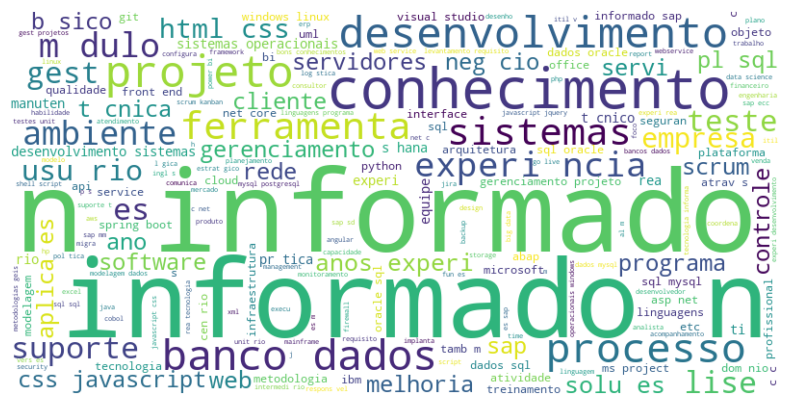

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Junta todos os textos processados em um só
text_all = ' '.join(data['informacoes_limpa'])

# Gera a nuvem
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_all)

# Mostra a nuvem
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# pip install openai

In [ ]:
# import pandas as pd
# import openai 
# import time
# import json

# # Configure sua chave
# client = openai.OpenAI()

# # Junta os textos
# todos_textos = "\n\n".join(data["informacoes_profissionais_conhecimentos_tecnicos"].dropna().tolist())

# # === Etapa 1: extrair tópicos ===
# prompt_topicos = f"""
# Leia a seguinte lista de descrições técnicas de profissionais da área de tecnologia.
# Identifique os principais tópicos, tecnologias, ferramentas, linguagens ou metodologias mencionadas.
# Retorne uma lista JSON com os tópicos principais (ex: ["Java", "React", "Scrum", ...]).

# Descrições:
# {todos_textos}
# """

# response = client.chat.completions.create(
#     model="gpt-3.5-turbo",
#     messages=[{"role": "user", "content": prompt_topicos}],
#     temperature=0
# )

# topicos_extraidos = json.loads(response.choices[0].message.content)
# print("📌 Tópicos extraídos:", topicos_extraidos)

# # === Etapa 2: classificar por candidato ===
# def classificar_texto(texto, topicos):
#     prompt = f"""
#     Leia a seguinte descrição técnica e diga se a pessoa demonstra experiência com os tópicos abaixo.
#     Responda com um JSON com `true` ou `false` para cada tópico.

#     Tópicos: {json.dumps(topicos)}
#     Texto: {texto}
#     """
#     try:
#         resp = client.chat.completions.create(
#             model="gpt-3.5-turbo",
#             messages=[{"role": "user", "content": prompt}],
#             temperature=0
#         )
#         return json.loads(resp.choices[0].message.content)
#     except Exception as e:
#         print(f"Erro: {e}")
#         return {topico: None for topico in topicos}

# resultados = []
# for i, texto in enumerate(data["informacoes_profissionais_conhecimentos_tecnicos"]):
#     print(f"🔍 Analisando {i+1}/{len(data)}")
#     resultados.append(classificar_texto(texto, topicos_extraidos))
#     time.sleep(1.5)

# df_topicos = pd.DataFrame(resultados)
# df_final = pd.concat([data, df_topicos], axis=1)
# df_final.to_csv("classificacao_topicos.csv", index=False)

# print("\n✅ Pronto! Arquivo salvo como classificacao_topicos.csv")


In [ ]:
categorias = {
    "backend": [
        
    ],
    "frontend": [
       
    ],
    "banco_dados": [
        
    ],
    "devops_infra": [
        
    ],
    "bi_dados": [
        
    ],
    "erp_sap": [
        
    ],
    "mainframe_legado": [
        
    ],
    "design_ux": [
        
    ],
    "gestao_agil": [
        
    ],
    "ciencia_dados_ia": [
       
    ]
}


In [ ]:
vagas = data[['id_vaga', 'perfil_vaga_principais_atividades']].drop_duplicates(subset = 'id_vaga')
vagas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5215 entries, 2 to 56698
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   id_vaga                            5215 non-null   int64 
 1   perfil_vaga_principais_atividades  5211 non-null   object
dtypes: int64(1), object(1)
memory usage: 122.2+ KB


In [ ]:
vagas[['backend_vaga', 'frontend_vaga', 'banco_dados_vaga', 'devops_infra_vaga', 'bi_dados_vaga', 'erp_sap_vaga', 'mainframe_legado_vaga', 'design_ux_vaga', 'gestao_agil_vaga', 'ciencia_dados_ia_vaga']] = None
vagas.head()


,id_vaga,perfil_vaga_principais_atividades,backend_vaga,frontend_vaga,banco_dados_vaga,devops_infra_vaga,bi_dados_vaga,erp_sap_vaga,mainframe_legado_vaga,design_ux_vaga,gestao_agil_vaga,ciencia_dados_ia_vaga
2,4531,Key skills required for the job are:\n\nPeople...,None,None,None,None,None,None,None,None,None,None
5,4533,Arquiteto\n\nFoco na área e automação.\n\nRequ...,None,None,None,None,None,None,None,None,None,None
8,4534,Automação de teste (conhecimento do código)\n\...,None,None,None,None,None,None,None,None,None,None
19,4535,Automação de teste\n\nResponsável pela entrega...,None,None,None,None,None,None,None,None,None,None
43,4544,"Suporte e desenvolvimento em Datastage, Shells...",None,None,None,None,None,None,None,None,None,None


In [ ]:
vagas.to_csv("vagas.csv", index=False)

In [ ]:
import pandas as pd
from openai import OpenAI
import json

# Inicializa o cliente
client = OpenAI(api_key="CHAVE")
# Dicionário de categorias acumulativas
categorias = {
    "backend": [],
    "frontend": [],
    "banco_dados": [],
    "devops_infra": [],
    "bi_dados": [],
    "erp_sap": [],
    "mainframe_legado": [],
    "design_ux": [],
    "gestao_agil": [],
    "ciencia_dados_ia": []
}

# Lista das categorias (para facilitar o uso)
categorias_keys = list(categorias.keys())

# Função para classificar uma vaga
def classificar_vaga(texto_vaga):
    prompt = f"""
A seguir está um texto de uma vaga de tecnologia. Classifique os termos encontrados nas seguintes categorias, retornando **listas de palavras ou expressões** encontradas ou inferidas em cada uma. Para cada termo identificado, inclua também variações ou sinônimos comuns (ex: Looker Studio, Looker, Data Studio).

Categorias:
- backend
- frontend
- banco_dados
- devops_infra
- bi_dados
- erp_sap
- mainframe_legado
- design_ux
- gestao_agil
- ciencia_dados_ia

Texto da vaga:
\"\"\"
{texto_vaga}
\"\"\"

Retorne em JSON válido com a estrutura:
{{
    "backend": [],
    "frontend": [],
    "banco_dados": [],
    "devops_infra": [],
    "bi_dados": [],
    "erp_sap": [],
    "mainframe_legado": [],
    "design_ux": [],
    "gestao_agil": [],
    "ciencia_dados_ia": []
}}
"""

    try:
        response = client.chat.completions.create(
            model="gpt-4",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.2
        )
        content = response.choices[0].message.content
        return json.loads(content)
    except Exception as e:
        print(f"Erro: {e}")
        return {cat: [] for cat in categorias_keys}

In [ ]:
# Suponha que seu DataFrame já tenha as colunas pré-criadas
# df = pd.read_excel("sua_base.xlsx")  # exemplo de leitura

def processar_linha(row):
    texto = row['perfil_vaga_principais_atividades']
    resultado = classificar_vaga(texto)
    
    # Preencher o DataFrame nas colunas *_vaga
    for categoria in categorias_keys:
        coluna_df = f"{categoria}_vaga"
        termos = resultado[categoria]
        row[coluna_df] = ", ".join(termos)
        
        # Atualizar o dict acumulador (sem duplicatas)
        for termo in termos:
            if termo not in categorias[categoria]:
                categorias[categoria].append(termo)
    return row

# Aplicar a função no DataFrame
df = vagas.apply(processar_linha, axis=1)


# Processamento 

In [145]:
data.head()

,id_vaga,titulo,modalidade,candidato_codigo,situacao_candidato,comentario,informacoes_basicas_limite_esperado_para_contratacao,informacoes_basicas_titulo_vaga,informacoes_basicas_vaga_sap,informacoes_basicas_cliente,informacoes_basicas_solicitante_cliente,informacoes_basicas_empresa_divisao,informacoes_basicas_tipo_contratacao,informacoes_basicas_prazo_contratacao,informacoes_basicas_objetivo_vaga,informacoes_basicas_prioridade_vaga,informacoes_basicas_origem_vaga,informacoes_basicas_superior_imediato,perfil_vaga_pais,perfil_vaga_estado,perfil_vaga_cidade,perfil_vaga_local_trabalho,perfil_vaga_vaga_especifica_para_pcd,perfil_vaga_faixa_etaria,perfil_vaga_nivel profissional,perfil_vaga_nivel_academico,perfil_vaga_nivel_ingles,perfil_vaga_nivel_espanhol,perfil_vaga_outro_idioma,perfil_vaga_areas_atuacao,perfil_vaga_principais_atividades,perfil_vaga_competencia_tecnicas_e_comportamentais,perfil_vaga_demais_observacoes,perfil_vaga_viagens_requeridas,perfil_vaga_equipamentos_necessarios,beneficios_valor_venda,beneficios_valor_compra_1,perfil_vaga_habilidades_comportamentais_necessarias,id_candidato,infos_basicas_objetivo_profissional,infos_basicas_local,infos_basicas_sabendo_de_nos_por,infos_basicas_codigo_profissional,informacoes_pessoais_fonte_indicacao,informacoes_pessoais_data_nascimento,informacoes_profissionais_titulo_profissional,informacoes_profissionais_area_atuacao,informacoes_profissionais_conhecimentos_tecnicos,informacoes_profissionais_certificacoes,informacoes_profissionais_outras_certificacoes,informacoes_profissionais_nivel_profissional,formacao_e_idiomas_nivel_academico,formacao_e_idiomas_nivel_ingles,formacao_e_idiomas_nivel_espanhol,formacao_e_idiomas_outro_idioma,cv_pt,formacao_e_idiomas_instituicao_ensino_superior,formacao_e_idiomas_cursos,match,possui_certificacao,remuneracao_limpa,informacoes_limpa_candidato
2,4531,2021-2607395-PeopleSoft Application Engine-Dom...,Não informado,25364.0,Contratado pela Decision,Data de Inicio: 12/04/2021,00-00-0000,2021-2607395-PeopleSoft Application Engine-Dom...,Não,Gonzalez and Sons,Valentim Duarte,Decision São Paulo,PJ/Autônomo,NaN,Contratação,Média: Média complexidade 6 a 10 dias,Nova Posição,Superior Imediato:,Brasil,São Paulo,São Paulo,2000.0,Não,De: Até:,Sênior,Ensino Médio Completo,Nenhum,Nenhum,Nenhum,Gestão e Alocação de Recursos de TI-,Key skills required for the job are:\n\nPeople...,O recurso Peoplesoft tem como responsabilidade...,"Remoto DEPOIS PRESENCIAL, TEMPO INDETERMINADO",NaN,Notebook padrão -,-,hora,NaN,25364.0,Liderança / Desenvolvimento,"São Paulo, São Paulo",Site de Empregos,25364.0,Site de Empregos: APINFO / Linkedin,31-01-1973,Liderança / Desenvolvimento,TI - Projetos,"- PeopleSoft (PeopleTools 8.49, 8.53, 8.55, 8....",Nenhum,- Capacitação PeopleSoft (Formação Técnica) – ...,Não informado,Ensino Superior Completo,Avançado,Intermediário,-,\n\nárea de atuação: lider de consultoria / ge...,Não informado,Tecnologia da Informação,1.0,Sim,15.0,peopletools sqr crystal xml publisher query ma...
5,4533,2021-2605708-Microfocus Application Life Cycle...,Não informado,26338.0,Contratado pela Decision,NaN,01-01-1970,2021-2605708-Microfocus Application Life Cycle...,Não,Barnes-Woods,Maysa Andrade,Decision São Paulo,PJ/Autônomo,NaN,Contratação,Média: Média complexidade 6 a 10 dias,Nova Posição,Superior Imediato:,Brasil,São Paulo,São Paulo,2000.0,Não,De: Até:,Sênior,Ensino Médio Completo,Técnico,Fluente,Nenhum,Gestão e Alocação de Recursos de TI-,Arquiteto\n\nFoco na área e automação.\n\nRequ...,Arquiteto\n\nFoco na área e automação.\n\nRequ...,Atuação somente em horário comercial. Tempo in...,NaN,NaN,"207,00 -",hora,Telefonica,26338.0,NaN,NaN,NaN,26338.0,:,0000-00-00,NaN,Não informado,Não informado,Nenhum,NaN,Não informado,Não informado,Não informado,Não informado,-,"solteiro, brasileiro, 21/06/1987\nhabilitação ...",Não informado,Não informado,1.0,Sim,NaN,nao informado
6,4533,2021-2605708-Microfocus Application Life Cycle...,Não informado,24645.0,Desistiu,Profissi

In [160]:
data.tail(5)

,id_vaga,titulo,modalidade,candidato_codigo,situacao_candidato,comentario,informacoes_basicas_limite_esperado_para_contratacao,informacoes_basicas_titulo_vaga,informacoes_basicas_vaga_sap,informacoes_basicas_cliente,informacoes_basicas_solicitante_cliente,informacoes_basicas_empresa_divisao,informacoes_basicas_tipo_contratacao,informacoes_basicas_prazo_contratacao,informacoes_basicas_objetivo_vaga,informacoes_basicas_prioridade_vaga,informacoes_basicas_origem_vaga,informacoes_basicas_superior_imediato,perfil_vaga_pais,perfil_vaga_estado,perfil_vaga_cidade,perfil_vaga_local_trabalho,perfil_vaga_vaga_especifica_para_pcd,perfil_vaga_faixa_etaria,perfil_vaga_nivel profissional,perfil_vaga_nivel_academico,perfil_vaga_nivel_ingles,perfil_vaga_nivel_espanhol,perfil_vaga_outro_idioma,perfil_vaga_areas_atuacao,perfil_vaga_principais_atividades,perfil_vaga_competencia_tecnicas_e_comportamentais,perfil_vaga_demais_observacoes,perfil_vaga_viagens_requeridas,perfil_vaga_equipamentos_necessarios,beneficios_valor_venda,beneficios_valor_compra_1,perfil_vaga_habilidades_comportamentais_necessarias,id_candidato,infos_basicas_objetivo_profissional,infos_basicas_local,infos_basicas_sabendo_de_nos_por,infos_basicas_codigo_profissional,informacoes_pessoais_fonte_indicacao,informacoes_pessoais_data_nascimento,informacoes_profissionais_titulo_profissional,informacoes_profissionais_area_atuacao,informacoes_profissionais_conhecimentos_tecnicos,informacoes_profissionais_certificacoes,informacoes_profissionais_outras_certificacoes,informacoes_profissionais_nivel_profissional,formacao_e_idiomas_nivel_academico,formacao_e_idiomas_nivel_ingles,formacao_e_idiomas_nivel_espanhol,formacao_e_idiomas_outro_idioma,cv_pt,formacao_e_idiomas_instituicao_ensino_superior,formacao_e_idiomas_cursos,match,possui_certificacao,remuneracao_limpa,informacoes_limpa_candidato
56582,14179,Analista Golange & Ruby,Não informado,36973.0,Não Aprovado pelo RH,Candidato atualmente na NTTData.,17-02-2025,Analista Golange & Ruby,Sim,Bishop-Reed,Lívia Vasconcelos,Decision São Paulo,"CLT Full, PJ/Autônomo",Indeterminado,Contratação,Alta: Alta complexidade 3 a 5 dias,Nova Posição,Superior Imediato:,Brasil,São Paulo,São Paulo,2000.0,Não,De: Até:,Analista,Ensino Superior Completo,Fluente,NaN,Nenhum,TI - Projetos-,Analista Golange & Ruby\n1. Tempo de Alocação ...,Go (Golang) e Ruby combina duas tecnologias ba...,NaN,Não,NaN,168 - p/ hora,Fechado,NaN,36973.0,programação,São Paulo,NaN,36973.0,:,0000-00-00,programação,Não informado,Não informado,Nenhum,NaN,Não informado,Não informado,Não informado,Não informado,-,"engenheiro de software - pj, ingresso rápido +...",Não informado,Não informado,0.0,Sim,NaN,nao informado
56597,14181,Azure Data Factory,Não informado,39637.0,Não Aprovado pelo RH,Candidato não possui inglês fluente.,18-02-2025,Azure Data Factory,Sim,Jenkins-Walker,Camila Costela,Decision São Paulo,"CLT Full, PJ/Autônomo",Indeterminado,Contratação,Alta: Alta complexidade 3 a 5 dias,Nova Posição,Superior Imediato:,Brasil,São Paulo,São Paulo,2000.0,Não,De: Até:,Sênior,Ensino Superior Completo,Fluente,NaN,Nenhum,TI - Projetos-,"Atuação remota, de 3 a 6 meses de projeto.",Inglês fluente.,NaN,Sim,NaN,168 -,Fechado,NaN,39637.0,Big Data,"São Paulo, São Paulo",NaN,39637.0,:,0000-00-00,Big Data,Não informado,Não informado,Nenhum,NaN,Não informado,Não informado,Não informado,Não informado,-,analista de bi / big data\n\ncódigo apinfo : 2...,Não informado,Não informado,0.0,Sim,NaN,nao informado
56616,14189,Consultor SAP SD - 1427,Não informado,19018.0,Desistiu,Não aceitou baixar o valor,10-03-2025,Consultor SAP SD - 1427,Sim,"Glover, Warren and Norris",Lorenzo Cunha,Decision São Paulo,"CLT Full, PJ/Autônomo",Determinado,Contratação,Alta: Alta complexidade 3 a 5 dias,Nova Posição,Superior Imediato:,Brasil,São Paulo,São Paulo,2000.0,Não,De: Até:,Analista,Ensino Superior Completo,Avançado,NaN,Português Básico,TI - SAP-,Vaga: CONSULTOR SAP SD\nModelo de trabalho: Hi...,Conhecimentos Técnicos Requerido

In [ ]:
#remover colunas que não são relevantes para o modelo
data.drop(columns=['modalidade', 'comentario', 'informacoes_basicas_limite_esperado_para_contratacao', 'informacoes_basicas_titulo_vaga', 'informacoes_basicas_vaga_sap', 
 'informacoes_basicas_cliente', 'informacoes_basicas_solicitante_cliente', 'informacoes_basicas_empresa_divisao', 'informacoes_basicas_tipo_contratacao',  
 'informacoes_basicas_prazo_contratacao', 'informacoes_basicas_objetivo_vaga', 'informacoes_basicas_prioridade_vaga', 'informacoes_basicas_origem_vaga',
 'informacoes_basicas_superior_imediato', 'perfil_vaga_local_trabalho', 'perfil_vaga_faixa_etaria', 'perfil_vaga_viagens_requeridas',
 'perfil_vaga_equipamentos_necessarios', 'beneficios_valor_venda', 'beneficios_valor_compra_1','candidato_codigo','infos_basicas_sabendo_de_nos_por',
 'infos_basicas_codigo_profissional', 'informacoes_pessoais_fonte_indicacao', 'informacoes_pessoais_data_nascimento', 'formacao_e_idiomas_instituicao_ensino_superior',
 'informacoes_limpa_candidato'], inplace=True)

In [ ]:
data.info()

In [169]:
#concatenar textos das colunas pra vaga

data['info_vaga'] = data[['perfil_vaga_areas_atuacao', 'perfil_vaga_principais_atividades', 'perfil_vaga_competencia_tecnicas_e_comportamentais', 'perfil_vaga_demais_observacoes',
  'perfil_vaga_habilidades_comportamentais_necessarias']].astype(str).apply(lambda row: ' '.join(row), axis=1)

data.head()

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/1910621329.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['info_vaga'] = data[['perfil_vaga_areas_atuacao', 'perfil_vaga_principais_atividades', 'perfil_vaga_competencia_tecnicas_e_comportamentais', 'perfil_vaga_demais_observacoes',


,id_vaga,titulo,situacao_candidato,perfil_vaga_pais,perfil_vaga_estado,perfil_vaga_cidade,perfil_vaga_vaga_especifica_para_pcd,perfil_vaga_nivel profissional,perfil_vaga_nivel_academico,perfil_vaga_nivel_ingles,perfil_vaga_nivel_espanhol,perfil_vaga_outro_idioma,perfil_vaga_areas_atuacao,perfil_vaga_principais_atividades,perfil_vaga_competencia_tecnicas_e_comportamentais,perfil_vaga_demais_observacoes,perfil_vaga_habilidades_comportamentais_necessarias,id_candidato,infos_basicas_objetivo_profissional,infos_basicas_local,informacoes_profissionais_titulo_profissional,informacoes_profissionais_area_atuacao,informacoes_profissionais_conhecimentos_tecnicos,informacoes_profissionais_certificacoes,informacoes_profissionais_outras_certificacoes,informacoes_profissionais_nivel_profissional,formacao_e_idiomas_nivel_academico,formacao_e_idiomas_nivel_ingles,formacao_e_idiomas_nivel_espanhol,formacao_e_idiomas_outro_idioma,cv_pt,formacao_e_idiomas_cursos,match,possui_certificacao,remuneracao_limpa,info_vaga
2,4531,2021-2607395-PeopleSoft Application Engine-Dom...,Contratado pela Decision,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Nenhum,Nenhum,Nenhum,Gestão e Alocação de Recursos de TI-,Key skills required for the job are:\n\nPeople...,O recurso Peoplesoft tem como responsabilidade...,"Remoto DEPOIS PRESENCIAL, TEMPO INDETERMINADO",NaN,25364.0,Liderança / Desenvolvimento,"São Paulo, São Paulo",Liderança / Desenvolvimento,TI - Projetos,"- PeopleSoft (PeopleTools 8.49, 8.53, 8.55, 8....",Nenhum,- Capacitação PeopleSoft (Formação Técnica) – ...,Não informado,Ensino Superior Completo,Avançado,Intermediário,-,\n\nárea de atuação: lider de consultoria / ge...,Tecnologia da Informação,1.0,Sim,15.0,Gestão e Alocação de Recursos de TI- Key skill...
5,4533,2021-2605708-Microfocus Application Life Cycle...,Contratado pela Decision,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Técnico,Fluente,Nenhum,Gestão e Alocação de Recursos de TI-,Arquiteto\n\nFoco na área e automação.\n\nRequ...,Arquiteto\n\nFoco na área e automação.\n\nRequ...,Atuação somente em horário comercial. Tempo in...,Telefonica,26338.0,NaN,NaN,NaN,Não informado,Não informado,Nenhum,NaN,Não informado,Não informado,Não informado,Não informado,-,"solteiro, brasileiro, 21/06/1987\nhabilitação ...",Não informado,1.0,Sim,NaN,Gestão e Alocação de Recursos de TI- Arquiteto...
6,4533,2021-2605708-Microfocus Application Life Cycle...,Desistiu,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Técnico,Fluente,Nenhum,Gestão e Alocação de Recursos de TI-,Arquiteto\n\nFoco na área e automação.\n\nRequ...,Arquiteto\n\nFoco na área e automação.\n\nRequ...,Atuação somente em horário comercial. Tempo in...,Telefonica,24645.0,NaN,NaN,NaN,Não informado,Não informado,Nenhum,NaN,Não informado,Não informado,Não informado,Não informado,-,analista de teste/qa\n\nprofissional hands on ...,Não informado,0.0,Sim,NaN,Gestão e Alocação de Recursos de TI- Arquiteto...
8,4534,2021-2605711-Microfocus QTP - UFT Automation T...,Desistiu,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Técnico,Nenhum,Nenhum,Gestão e Alocação de Recursos de TI-,Automação de teste (conhecimento do código)\n\...,Automação de teste (conhecimento do código)\n\...,NaN,Tempo indeterminado.\nAtuação remota.\nPodem s...,26205.0,NaN,NaN,NaN,Não informado,Não informado,Nenhum,NaN,Não informado,Não informado,Não informado,Não informado,-,"idade: 37 anos\n172 apto.2703, vila maria josé...",Não informado,0.0,Sim,NaN,Gestão e Alocação de Recursos de TI- Automação...
9,4534,2021-2605711-Microfocus QTP - UFT Automation T...,Não Aprovado pelo Cliente,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Técnico,Nenhum,Nenhum,Gestão e Alocação de Recursos de TI-,Automação de teste (conhecimento do código)\n\...,Automação de teste (conhecimento do código)\n\...,NaN,Tempo indeterminado.\nAtuação remota.\nPodem s...,26003.0,NaN,NaN,NaN,Não informado,Não informado,Nenhum,NaN,Não informado,Não informado,

In [172]:
# Deletar colunas ['perfil_vaga_areas_atuacao', 'perfil_vaga_principais_atividades', 'perfil_vaga_competencia_tecnicas_e_comportamentais', 'perfil_vaga_demais_observacoes','perfil_vaga_habilidades_comportamentais_necessarias']
data.drop(columns=['perfil_vaga_areas_atuacao', 'perfil_vaga_principais_atividades', 'perfil_vaga_competencia_tecnicas_e_comportamentais', 'perfil_vaga_demais_observacoes','perfil_vaga_habilidades_comportamentais_necessarias'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11992 entries, 2 to 56698
Data columns (total 31 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   id_vaga                                           11992 non-null  int64  
 1   titulo                                            11992 non-null  object 
 2   situacao_candidato                                11992 non-null  object 
 3   perfil_vaga_pais                                  11988 non-null  object 
 4   perfil_vaga_estado                                11979 non-null  object 
 5   perfil_vaga_cidade                                11939 non-null  object 
 6   perfil_vaga_vaga_especifica_para_pcd              10468 non-null  object 
 7   perfil_vaga_nivel profissional                    11988 non-null  object 
 8   perfil_vaga_nivel_academico                       11988 non-null  object 
 9   perfil_vaga_nivel_ingl

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/4041843701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['perfil_vaga_areas_atuacao', 'perfil_vaga_principais_atividades', 'perfil_vaga_competencia_tecnicas_e_comportamentais', 'perfil_vaga_demais_observacoes','perfil_vaga_habilidades_comportamentais_necessarias'], inplace=True)


In [171]:
data.head()

,id_vaga,titulo,situacao_candidato,perfil_vaga_pais,perfil_vaga_estado,perfil_vaga_cidade,perfil_vaga_vaga_especifica_para_pcd,perfil_vaga_nivel profissional,perfil_vaga_nivel_academico,perfil_vaga_nivel_ingles,perfil_vaga_nivel_espanhol,perfil_vaga_outro_idioma,perfil_vaga_areas_atuacao,perfil_vaga_principais_atividades,perfil_vaga_competencia_tecnicas_e_comportamentais,perfil_vaga_demais_observacoes,perfil_vaga_habilidades_comportamentais_necessarias,id_candidato,infos_basicas_objetivo_profissional,infos_basicas_local,informacoes_profissionais_titulo_profissional,informacoes_profissionais_area_atuacao,informacoes_profissionais_conhecimentos_tecnicos,informacoes_profissionais_certificacoes,informacoes_profissionais_outras_certificacoes,informacoes_profissionais_nivel_profissional,formacao_e_idiomas_nivel_academico,formacao_e_idiomas_nivel_ingles,formacao_e_idiomas_nivel_espanhol,formacao_e_idiomas_outro_idioma,cv_pt,formacao_e_idiomas_cursos,match,possui_certificacao,remuneracao_limpa,info_vaga
2,4531,2021-2607395-PeopleSoft Application Engine-Dom...,Contratado pela Decision,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Nenhum,Nenhum,Nenhum,Gestão e Alocação de Recursos de TI-,Key skills required for the job are:\n\nPeople...,O recurso Peoplesoft tem como responsabilidade...,"Remoto DEPOIS PRESENCIAL, TEMPO INDETERMINADO",NaN,25364.0,Liderança / Desenvolvimento,"São Paulo, São Paulo",Liderança / Desenvolvimento,TI - Projetos,"- PeopleSoft (PeopleTools 8.49, 8.53, 8.55, 8....",Nenhum,- Capacitação PeopleSoft (Formação Técnica) – ...,Não informado,Ensino Superior Completo,Avançado,Intermediário,-,\n\nárea de atuação: lider de consultoria / ge...,Tecnologia da Informação,1.0,Sim,15.0,Gestão e Alocação de Recursos de TI- Key skill...
5,4533,2021-2605708-Microfocus Application Life Cycle...,Contratado pela Decision,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Técnico,Fluente,Nenhum,Gestão e Alocação de Recursos de TI-,Arquiteto\n\nFoco na área e automação.\n\nRequ...,Arquiteto\n\nFoco na área e automação.\n\nRequ...,Atuação somente em horário comercial. Tempo in...,Telefonica,26338.0,NaN,NaN,NaN,Não informado,Não informado,Nenhum,NaN,Não informado,Não informado,Não informado,Não informado,-,"solteiro, brasileiro, 21/06/1987\nhabilitação ...",Não informado,1.0,Sim,NaN,Gestão e Alocação de Recursos de TI- Arquiteto...
6,4533,2021-2605708-Microfocus Application Life Cycle...,Desistiu,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Técnico,Fluente,Nenhum,Gestão e Alocação de Recursos de TI-,Arquiteto\n\nFoco na área e automação.\n\nRequ...,Arquiteto\n\nFoco na área e automação.\n\nRequ...,Atuação somente em horário comercial. Tempo in...,Telefonica,24645.0,NaN,NaN,NaN,Não informado,Não informado,Nenhum,NaN,Não informado,Não informado,Não informado,Não informado,-,analista de teste/qa\n\nprofissional hands on ...,Não informado,0.0,Sim,NaN,Gestão e Alocação de Recursos de TI- Arquiteto...
8,4534,2021-2605711-Microfocus QTP - UFT Automation T...,Desistiu,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Técnico,Nenhum,Nenhum,Gestão e Alocação de Recursos de TI-,Automação de teste (conhecimento do código)\n\...,Automação de teste (conhecimento do código)\n\...,NaN,Tempo indeterminado.\nAtuação remota.\nPodem s...,26205.0,NaN,NaN,NaN,Não informado,Não informado,Nenhum,NaN,Não informado,Não informado,Não informado,Não informado,-,"idade: 37 anos\n172 apto.2703, vila maria josé...",Não informado,0.0,Sim,NaN,Gestão e Alocação de Recursos de TI- Automação...
9,4534,2021-2605711-Microfocus QTP - UFT Automation T...,Não Aprovado pelo Cliente,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Técnico,Nenhum,Nenhum,Gestão e Alocação de Recursos de TI-,Automação de teste (conhecimento do código)\n\...,Automação de teste (conhecimento do código)\n\...,NaN,Tempo indeterminado.\nAtuação remota.\nPodem s...,26003.0,NaN,NaN,NaN,Não informado,Não informado,Nenhum,NaN,Não informado,Não informado,

In [ ]:
#concatenar textos das colunas pra candidato

data['info_candidato'] = data[['infos_basicas_objetivo_profissional', 'informacoes_profissionais_titulo_profissional', 'informacoes_profissionais_area_atuacao', 'informacoes_profissionais_conhecimentos_tecnicos',
 'informacoes_profissionais_certificacoes', 'informacoes_profissionais_outras_certificacoes', 'cv_pt', 'formacao_e_idiomas_cursos']].astype(str).apply(lambda row: ' '.join(row), axis=1)


# Deletar colunas
data.drop(columns=['infos_basicas_objetivo_profissional', 'informacoes_profissionais_titulo_profissional', 'informacoes_profissionais_area_atuacao', 'informacoes_profissionais_conhecimentos_tecnicos',
 'informacoes_profissionais_certificacoes', 'informacoes_profissionais_outras_certificacoes', 'cv_pt', 'formacao_e_idiomas_cursos'], inplace=True)
data.info()

In [97]:
categorias = {
  "backend": [
    "java", "spring", "spring boot", "asp.net", "asp net", "c#", "c sharp", ".net core", ".net",
    "node", "nodejs", "express.js", "php", "laravel", "django", "flask", "kotlin", "ruby", "rails",
    "ruby on rails", "grails", "fastapi", "hapi.js", "nestjs"
  ],
  "frontend": [
    "html", "css", "javascript", "js", "react", "reactjs", "vue", "vue.js", "angular", "angularjs",
    "bootstrap", "jquery", "typescript", "nextjs", "next.js", "nuxtjs", "sass", "scss", "tailwind",
    "tailwindcss", "vite", "astro"
  ],
  "banco_dados": [
    "sql", "mysql", "oracle", "oracle db", "postgresql", "postgres", "mongodb", "mongo", "pl/sql",
    "sqlite", "db2", "nosql", "firebird", "redis", "elasticsearch", "clickhouse", "dynamodb",
    "bigquery", "snowflake", "cassandra"
  ],
  "devops_infra": [
    "docker", "kubernetes", "k8s", "jenkins", "linux", "bash", "shell script", "ansible",
    "terraform", "github actions", "gitlab ci", "ci/cd", "azure devops", "aws devops", "vagrant",
    "grafana", "zabbix", "prometheus", "new relic", "splunk", "helm", "argo cd"
  ],
  "bi_dados": [
    "power bi", "qlikview", "qliksense", "jasperreports", "etl", "tableau", "looker", "looker studio",
    "datastudio", "google data studio", "pentaho", "superset", "metabase", "microstrategy"
  ],
  "erp_sap": [
    "sap", "sap ecc", "sap s/4hana", "sap mm", "sap fi", "sap basis", "totvs", "protheus",
    "oracle ebs", "oracle erp", "linx", "erp", "sap abap", "sap hana", "sap bw", "sap fico", "sap sd"
  ],
  "mainframe_legado": [
    "cobol", "as400", "ibm i", "jcl", "db2", "cics", "ims", "pl/i", "pli", "natural", "vsam",
    "mainframe", "rexec"
  ],
  "design_ux": [
    "ux", "ui", "figma", "wireframes", "wireframing", "design thinking", "prototipo", "protótipo",
    "adobe xd", "sketch", "interface", "user experience", "user interface", "journey mapping",
    "heuristic evaluation", "ux research"
  ],
  "gestao_agil": [
    "scrum", "kanban", "pmbok", "jira", "squad", "xp", "extreme programming", "agile", "agilidade",
    "product owner", "po", "scrum master", "sm", "project manager", "pm", "confluence", "safe", "lean",
    "okrs"
  ],
  "ciencia_dados_ia": [
    "r", "pandas", "numpy", "scikit-learn", "sklearn", "tensorflow", "keras", "pytorch",
    "machine learning", "ml", "ia", "inteligência artificial", "inteligencia artificial",
    "deep learning", "data science", "data scientist", "mlops", "nlp", "huggingface", "openai",
    "llm", "chatgpt"
  ],
  "habilidades_comportamentais": [
    "comunicacao", "comunicacao", "relacionamento interpessoal", "trabalho em equipe",
    "organização", "organizado", "proatividade", "resiliência", "lideranca",
    "resolução de problemas", "empatia", "escuta ativa", "negociação", "autonomia",
    "orientação para resultados", "gestao de tempo", "inteligência emocional",
    "adaptabilidade", "flexibilidade", "responsabilidade", "comprometimento",
    "foco no cliente", "pensamento crítico", "ética", "colaboracao", "postura profissional",
    "dinamismo", "atendimento", "atendimento ao cliente", "suporte ao cliente",
    "controle de agenda", "follow-up", "rotina administrativa", "comportamental"
  ]
}

In [181]:
data.head()

,id_vaga,titulo,situacao_candidato,perfil_vaga_pais,perfil_vaga_estado,perfil_vaga_cidade,perfil_vaga_vaga_especifica_para_pcd,perfil_vaga_nivel profissional,perfil_vaga_nivel_academico,perfil_vaga_nivel_ingles,perfil_vaga_nivel_espanhol,perfil_vaga_outro_idioma,id_candidato,infos_basicas_local,informacoes_profissionais_nivel_profissional,formacao_e_idiomas_nivel_academico,formacao_e_idiomas_nivel_ingles,formacao_e_idiomas_nivel_espanhol,formacao_e_idiomas_outro_idioma,match,possui_certificacao,remuneracao_limpa,info_vaga,info_candidato
2,4531,2021-2607395-PeopleSoft Application Engine-Dom...,Contratado pela Decision,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Nenhum,Nenhum,Nenhum,25364.0,"São Paulo, São Paulo",Não informado,Ensino Superior Completo,Avançado,Intermediário,-,1.0,Sim,15.0,Gestão e Alocação de Recursos de TI- Key skill...,Liderança / Desenvolvimento Liderança / Desenv...
5,4533,2021-2605708-Microfocus Application Life Cycle...,Contratado pela Decision,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Técnico,Fluente,Nenhum,26338.0,NaN,Não informado,Não informado,Não informado,Não informado,-,1.0,Sim,NaN,Gestão e Alocação de Recursos de TI- Arquiteto...,nan nan Não informado Não informado Nenhum nan...
6,4533,2021-2605708-Microfocus Application Life Cycle...,Desistiu,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Técnico,Fluente,Nenhum,24645.0,NaN,Não informado,Não informado,Não informado,Não informado,-,0.0,Sim,NaN,Gestão e Alocação de Recursos de TI- Arquiteto...,nan nan Não informado Não informado Nenhum nan...
8,4534,2021-2605711-Microfocus QTP - UFT Automation T...,Desistiu,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Técnico,Nenhum,Nenhum,26205.0,NaN,Não informado,Não informado,Não informado,Não informado,-,0.0,Sim,NaN,Gestão e Alocação de Recursos de TI- Automação...,nan nan Não informado Não informado Nenhum nan...
9,4534,2021-2605711-Microfocus QTP - UFT Automation T...,Não Aprovado pelo Cliente,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Técnico,Nenhum,Nenhum,26003.0,NaN,Não informado,Não informado,Não informado,Não informado,-,0.0,Sim,NaN,Gestão e Alocação de Recursos de TI- Automação...,nan nan Não informado Não informado Nenhum nan...


In [ ]:
# !pip install nltk unidecode pandas

In [178]:
import pandas as pd
import re
import spacy
from unidecode import unidecode
from sklearn.feature_extraction.text import TfidfVectorizer

nlp = spacy.load('pt_core_news_sm')

def preprocess(text):
    if pd.isnull(text):
        return ""
    
    # Minúsculas
    text = text.lower()
    
    # Remover acentos
    text = unidecode(text)
    
    # Manter letras, # e espaços (remove números e pontuação)
    text = re.sub(r'[^a-zA-Z#\s]', ' ', text)
    
    # Remover espaços extras
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Processar com spaCy
    doc = nlp(text)
    
    # Remover verbos e stopwords
    palavras_filtradas = [
        token.text for token in doc
        if token.pos_ != 'VERB' and not token.is_stop and len(token.text) > 1
    ]
    
    return ' '.join(palavras_filtradas)


In [182]:
# Aplicar a função na coluna
data['info_limpa_candidato'] = data['info_candidato'].apply(preprocess)
data.head()


/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/69035341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['info_limpa_candidato'] = data['info_candidato'].apply(preprocess)


,id_vaga,titulo,situacao_candidato,perfil_vaga_pais,perfil_vaga_estado,perfil_vaga_cidade,perfil_vaga_vaga_especifica_para_pcd,perfil_vaga_nivel profissional,perfil_vaga_nivel_academico,perfil_vaga_nivel_ingles,perfil_vaga_nivel_espanhol,perfil_vaga_outro_idioma,id_candidato,infos_basicas_local,informacoes_profissionais_nivel_profissional,formacao_e_idiomas_nivel_academico,formacao_e_idiomas_nivel_ingles,formacao_e_idiomas_nivel_espanhol,formacao_e_idiomas_outro_idioma,match,possui_certificacao,remuneracao_limpa,info_vaga,info_candidato,info_limpa_candidato
2,4531,2021-2607395-PeopleSoft Application Engine-Dom...,Contratado pela Decision,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Nenhum,Nenhum,Nenhum,25364.0,"São Paulo, São Paulo",Não informado,Ensino Superior Completo,Avançado,Intermediário,-,1.0,Sim,15.0,Gestão e Alocação de Recursos de TI- Key skill...,Liderança / Desenvolvimento Liderança / Desenv...,lideranca desenvolvimento lideranca desenvolvi...
5,4533,2021-2605708-Microfocus Application Life Cycle...,Contratado pela Decision,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Técnico,Fluente,Nenhum,26338.0,NaN,Não informado,Não informado,Não informado,Não informado,-,1.0,Sim,NaN,Gestão e Alocação de Recursos de TI- Arquiteto...,nan nan Não informado Não informado Nenhum nan...,nan nan nao informado nao nenhum nan solteiro ...
6,4533,2021-2605708-Microfocus Application Life Cycle...,Desistiu,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Técnico,Fluente,Nenhum,24645.0,NaN,Não informado,Não informado,Não informado,Não informado,-,0.0,Sim,NaN,Gestão e Alocação de Recursos de TI- Arquiteto...,nan nan Não informado Não informado Nenhum nan...,nan nan nao informado nao nenhum nan analista ...
8,4534,2021-2605711-Microfocus QTP - UFT Automation T...,Desistiu,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Técnico,Nenhum,Nenhum,26205.0,NaN,Não informado,Não informado,Não informado,Não informado,-,0.0,Sim,NaN,Gestão e Alocação de Recursos de TI- Automação...,nan nan Não informado Não informado Nenhum nan...,nan nan nao informado nao nenhum nan idade ano...
9,4534,2021-2605711-Microfocus QTP - UFT Automation T...,Não Aprovado pelo Cliente,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Técnico,Nenhum,Nenhum,26003.0,NaN,Não informado,Não informado,Não informado,Não informado,-,0.0,Sim,NaN,Gestão e Alocação de Recursos de TI- Automação...,nan nan Não informado Não informado Nenhum nan...,nan nan nao informado nao nenhum nan solteira ...


In [183]:
# Aplicar a função na coluna
data['info_limpa_vaga'] = data['info_vaga'].apply(preprocess)
data.head()

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_21358/2692880295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['info_limpa_vaga'] = data['info_vaga'].apply(preprocess)


,id_vaga,titulo,situacao_candidato,perfil_vaga_pais,perfil_vaga_estado,perfil_vaga_cidade,perfil_vaga_vaga_especifica_para_pcd,perfil_vaga_nivel profissional,perfil_vaga_nivel_academico,perfil_vaga_nivel_ingles,perfil_vaga_nivel_espanhol,perfil_vaga_outro_idioma,id_candidato,infos_basicas_local,informacoes_profissionais_nivel_profissional,formacao_e_idiomas_nivel_academico,formacao_e_idiomas_nivel_ingles,formacao_e_idiomas_nivel_espanhol,formacao_e_idiomas_outro_idioma,match,possui_certificacao,remuneracao_limpa,info_vaga,info_candidato,info_limpa_candidato,info_limpa_vaga
2,4531,2021-2607395-PeopleSoft Application Engine-Dom...,Contratado pela Decision,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Nenhum,Nenhum,Nenhum,25364.0,"São Paulo, São Paulo",Não informado,Ensino Superior Completo,Avançado,Intermediário,-,1.0,Sim,15.0,Gestão e Alocação de Recursos de TI- Key skill...,Liderança / Desenvolvimento Liderança / Desenv...,lideranca desenvolvimento lideranca desenvolvi...,gestao alocacao recursos ti key skills require...
5,4533,2021-2605708-Microfocus Application Life Cycle...,Contratado pela Decision,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Técnico,Fluente,Nenhum,26338.0,NaN,Não informado,Não informado,Não informado,Não informado,-,1.0,Sim,NaN,Gestão e Alocação de Recursos de TI- Arquiteto...,nan nan Não informado Não informado Nenhum nan...,nan nan nao informado nao nenhum nan solteiro ...,gestao alocacao recursos ti arquiteto foco are...
6,4533,2021-2605708-Microfocus Application Life Cycle...,Desistiu,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Técnico,Fluente,Nenhum,24645.0,NaN,Não informado,Não informado,Não informado,Não informado,-,0.0,Sim,NaN,Gestão e Alocação de Recursos de TI- Arquiteto...,nan nan Não informado Não informado Nenhum nan...,nan nan nao informado nao nenhum nan analista ...,gestao alocacao recursos ti arquiteto foco are...
8,4534,2021-2605711-Microfocus QTP - UFT Automation T...,Desistiu,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Técnico,Nenhum,Nenhum,26205.0,NaN,Não informado,Não informado,Não informado,Não informado,-,0.0,Sim,NaN,Gestão e Alocação de Recursos de TI- Automação...,nan nan Não informado Não informado Nenhum nan...,nan nan nao informado nao nenhum nan idade ano...,gestao alocacao recursos ti teste conhecimento...
9,4534,2021-2605711-Microfocus QTP - UFT Automation T...,Não Aprovado pelo Cliente,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Técnico,Nenhum,Nenhum,26003.0,NaN,Não informado,Não informado,Não informado,Não informado,-,0.0,Sim,NaN,Gestão e Alocação de Recursos de TI- Automação...,nan nan Não informado Não informado Nenhum nan...,nan nan nao informado nao nenhum nan solteira ...,gestao alocacao recursos ti teste conhecimento...


In [184]:
data.to_csv('data_limpa.csv', index=False)

In [98]:
import pandas as pd
data = pd.read_csv('/Users/leticiapires/Desktop/AIDecision/data_limpa.csv')

In [99]:
def tem_match(texto, palavras):
    if texto == "nao informado" or pd.isnull(texto):
        return False
    return any(palavra in texto for palavra in palavras)


for categoria, palavras in categorias.items():
    col_candidato = f"match_{categoria}_candidato"
    col_vaga = f"match_{categoria}_vaga"
    data[col_candidato] = data['info_limpa_candidato'].apply(lambda x: tem_match(x, palavras))
    data[col_vaga] = data['info_limpa_vaga'].apply(lambda x: tem_match(x, palavras))

data.head()

,id_vaga,titulo,situacao_candidato,perfil_vaga_pais,perfil_vaga_estado,perfil_vaga_cidade,perfil_vaga_vaga_especifica_para_pcd,perfil_vaga_nivel profissional,perfil_vaga_nivel_academico,perfil_vaga_nivel_ingles,...,match_mainframe_legado_candidato,match_mainframe_legado_vaga,match_design_ux_candidato,match_design_ux_vaga,match_gestao_agil_candidato,match_gestao_agil_vaga,match_ciencia_dados_ia_candidato,match_ciencia_dados_ia_vaga,match_habilidades_comportamentais_candidato,match_habilidades_comportamentais_vaga
0,4531,2021-2607395-PeopleSoft Application Engine-Dom...,Contratado pela Decision,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Nenhum,...,False,True,True,True,True,True,True,True,True,True
1,4533,2021-2605708-Microfocus Application Life Cycle...,Contratado pela Decision,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Técnico,...,False,False,True,True,True,True,True,True,True,False
2,4533,2021-2605708-Microfocus Application Life Cycle...,Desistiu,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Técnico,...,False,False,True,True,False,True,True,True,False,False
3,4534,2021-2605711-Microfocus QTP - UFT Automation T...,Desistiu,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Técnico,...,False,False,True,False,True,True,True,True,False,False
4,4534,2021-2605711-Microfocus QTP - UFT Automation T...,Não Aprovado pelo Cliente,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Técnico,...,True,False,True,False,True,True,True,True,True,False


In [100]:
# Juntar todas as palavras-chave de todas as categorias
todas_palavras = set(p for lista in categorias.values() for p in lista)

def calcular_score_total(texto_candidato, texto_vaga):
    if pd.isnull(texto_vaga) or texto_vaga == "nao informado":
        return 0.0
    if pd.isnull(texto_candidato) or texto_candidato == "nao informado":
        return 0.0
    
    # Separar palavras presentes nos textos
    palavras_vaga = set([p for p in texto_vaga.split() if p in todas_palavras])
    palavras_candidato = set([p for p in texto_candidato.split() if p in todas_palavras])
    
    if not palavras_vaga:
        return 0.0

    match = palavras_vaga.intersection(palavras_candidato)
    return round(len(match) / len(palavras_vaga), 2)

# Aplicar no DataFrame
data['score_total'] = data.apply(
    lambda row: calcular_score_total(
        row['info_limpa_candidato'],
        row['info_limpa_vaga']
    ),
    axis=1
)

data.head()

,id_vaga,titulo,situacao_candidato,perfil_vaga_pais,perfil_vaga_estado,perfil_vaga_cidade,perfil_vaga_vaga_especifica_para_pcd,perfil_vaga_nivel profissional,perfil_vaga_nivel_academico,perfil_vaga_nivel_ingles,...,match_mainframe_legado_vaga,match_design_ux_candidato,match_design_ux_vaga,match_gestao_agil_candidato,match_gestao_agil_vaga,match_ciencia_dados_ia_candidato,match_ciencia_dados_ia_vaga,match_habilidades_comportamentais_candidato,match_habilidades_comportamentais_vaga,score_total
0,4531,2021-2607395-PeopleSoft Application Engine-Dom...,Contratado pela Decision,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Nenhum,...,True,True,True,True,True,True,True,True,True,1.0
1,4533,2021-2605708-Microfocus Application Life Cycle...,Contratado pela Decision,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Técnico,...,False,True,True,True,True,True,True,True,False,0.0
2,4533,2021-2605708-Microfocus Application Life Cycle...,Desistiu,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Técnico,...,False,True,True,False,True,True,True,False,False,0.0
3,4534,2021-2605711-Microfocus QTP - UFT Automation T...,Desistiu,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Técnico,...,False,True,False,True,True,True,True,False,False,1.0
4,4534,2021-2605711-Microfocus QTP - UFT Automation T...,Não Aprovado pelo Cliente,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Técnico,...,False,True,False,True,True,True,True,True,False,0.0


In [101]:
#salvar dataframe final
data.to_csv('data_final.csv', index=False)

# Preparação modelo + normalização

In [ ]:
#Deletar colunas ['id_vaga', 'situacao_candidato', 'info_vaga', 'info_candidato', 'info_limpa_candidato', 'info_limpa_vaga']
data.drop(columns=['id_vaga', 'situacao_candidato', 'info_vaga', 'info_candidato', 'id_candidato', 'info_limpa_candidato', 'info_limpa_vaga'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11992 entries, 0 to 11991
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   titulo                                        11992 non-null  object 
 1   perfil_vaga_pais                              11988 non-null  object 
 2   perfil_vaga_estado                            11979 non-null  object 
 3   perfil_vaga_cidade                            11939 non-null  object 
 4   perfil_vaga_vaga_especifica_para_pcd          10468 non-null  object 
 5   perfil_vaga_nivel profissional                11988 non-null  object 
 6   perfil_vaga_nivel_academico                   11988 non-null  object 
 7   perfil_vaga_nivel_ingles                      11988 non-null  object 
 8   perfil_vaga_nivel_espanhol                    10824 non-null  object 
 9   perfil_vaga_outro_idioma                      11992 non-null 

In [65]:
data.head()

,titulo,perfil_vaga_pais,perfil_vaga_estado,perfil_vaga_cidade,perfil_vaga_vaga_especifica_para_pcd,perfil_vaga_nivel profissional,perfil_vaga_nivel_academico,perfil_vaga_nivel_ingles,perfil_vaga_nivel_espanhol,perfil_vaga_outro_idioma,...,match_mainframe_legado_vaga,match_design_ux_candidato,match_design_ux_vaga,match_gestao_agil_candidato,match_gestao_agil_vaga,match_ciencia_dados_ia_candidato,match_ciencia_dados_ia_vaga,match_habilidades_comportamentais_candidato,match_habilidades_comportamentais_vaga,score_total
0,2021-2607395-PeopleSoft Application Engine-Dom...,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Nenhum,Nenhum,Nenhum,...,True,True,True,True,True,True,True,True,True,1.0
1,2021-2605708-Microfocus Application Life Cycle...,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Técnico,Fluente,Nenhum,...,False,True,True,True,True,True,True,True,False,0.0
2,2021-2605708-Microfocus Application Life Cycle...,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Técnico,Fluente,Nenhum,...,False,True,True,False,True,True,True,False,False,0.0
3,2021-2605711-Microfocus QTP - UFT Automation T...,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Técnico,Nenhum,Nenhum,...,False,True,False,True,True,True,True,False,False,1.0
4,2021-2605711-Microfocus QTP - UFT Automation T...,Brasil,São Paulo,São Paulo,Não,Sênior,Ensino Médio Completo,Técnico,Nenhum,Nenhum,...,False,True,False,True,True,True,True,True,False,0.0


In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
def label_encode_column(df, column_name):
    """
    Aplica Label Encoding em uma coluna do DataFrame e cria uma nova coluna com sufixo '_code'.
    Remove a coluna original após codificação.
    """
    le = LabelEncoder()
    try:
        df[column_name + '_code'] = le.fit_transform(df[column_name].astype(str))
        df.drop(columns=[column_name], inplace=True)
    except Exception as e:
        print(f"Erro ao codificar a coluna '{column_name}': {e}")
    return df

In [13]:
data_model = data.copy()

In [69]:
colunas_para_codificar = [
    'perfil_vaga_pais', 'perfil_vaga_estado', 'perfil_vaga_cidade', 'titulo',
    'perfil_vaga_nivel profissional', 'perfil_vaga_nivel_academico', 'perfil_vaga_nivel_ingles',
    'perfil_vaga_nivel_espanhol', 'perfil_vaga_outro_idioma',
    'informacoes_profissionais_nivel_profissional',
    'formacao_e_idiomas_nivel_academico', 'formacao_e_idiomas_nivel_ingles',
    'formacao_e_idiomas_nivel_espanhol', 'formacao_e_idiomas_outro_idioma',
    'infos_basicas_local'
]

for coluna in colunas_para_codificar:
    data_model = label_encode_column(data_model, coluna)

In [72]:
data_model['remuneracao_limpa'].fillna(data_model['remuneracao_limpa'].median(), inplace=True)

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_31157/786298984.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_model['remuneracao_limpa'].fillna(data_model['remuneracao_limpa'].median(), inplace=True)


In [73]:
# Converter pra booleano perfil_vaga_vaga_especifica_para_pcd, possui_certificacao
data_model['perfil_vaga_vaga_especifica_para_pcd'] = data_model['perfil_vaga_vaga_especifica_para_pcd'].astype(bool)
data_model['possui_certificacao'] = data_model['possui_certificacao'].astype(bool)

In [50]:
data_model.head()

,perfil_vaga_vaga_especifica_para_pcd,id_candidato,match,possui_certificacao,remuneracao_limpa,match_backend_candidato,match_backend_vaga,match_frontend_candidato,match_frontend_vaga,match_banco_dados_candidato,...,perfil_vaga_nivel_academico_code,perfil_vaga_nivel_ingles_code,perfil_vaga_nivel_espanhol_code,perfil_vaga_outro_idioma_code,informacoes_profissionais_nivel_profissional_code,formacao_e_idiomas_nivel_academico_code,formacao_e_idiomas_nivel_ingles_code,formacao_e_idiomas_nivel_espanhol_code,formacao_e_idiomas_outro_idioma_code,infos_basicas_local_code
0,True,25364.0,1.0,True,15.0,True,False,True,True,True,...,1,4,4,7,5,8,0,3,0,273
1,True,26338.0,1.0,True,14.0,True,False,True,False,True,...,1,5,2,7,5,17,5,5,0,298
2,True,24645.0,0.0,True,14.0,False,False,False,False,False,...,1,5,2,7,5,17,5,5,0,298
3,True,26205.0,0.0,True,14.0,True,True,True,False,True,...,1,5,4,7,5,17,5,5,0,298
4,True,26003.0,0.0,True,14.0,True,True,True,False,True,...,1,5,4,7,5,17,5,5,0,298


In [ ]:
# correlation_matrix = data_model.corr(numeric_only=True)

In [ ]:
# data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11992 entries, 2 to 56698
Data columns (total 43 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   perfil_vaga_vaga_especifica_para_pcd               11992 non-null  bool   
 1   id_candidato                                       10102 non-null  float64
 2   match                                              11992 non-null  float64
 3   possui_certificacao                                11992 non-null  bool   
 4   remuneracao_limpa                                  11992 non-null  float64
 5   match_backend_candidato                            11992 non-null  bool   
 6   match_backend_vaga                                 11992 non-null  bool   
 7   match_frontend_candidato                           11992 non-null  bool   
 8   match_frontend_vaga                                11992 non-null  bool   
 9   match_banco

# Modelo ML

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [75]:
# Seleciona todas as colunas numéricas e booleanas, exceto 'match' e 'id_candidato'
X = data_model.drop(columns=['match', 'id_candidato'])
y = data_model['match']

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando e treinando o modelo
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Fazendo previsões
y_pred = modelo.predict(X_test)

# Avaliando o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.7559755419677598

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.77      0.97      0.86      2685
         1.0       0.59      0.13      0.21       913

    accuracy                           0.76      3598
   macro avg       0.68      0.55      0.53      3598
weighted avg       0.72      0.76      0.69      3598



/Users/leticiapires/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Balanceamento

In [54]:
pip install imbalanced-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [55]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 1. Separar variáveis
X = data_model.drop(columns=['match', 'id_candidato'])
y = data_model['match'].astype(int)  # converter para classe binária (0 ou 1)

# 2. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Balancear os dados com SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Antes do balanceamento:", y_train.value_counts().to_dict())
print("Depois do balanceamento:", pd.Series(y_train_res).value_counts().to_dict())

# 4. Criar e treinar o modelo
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train_res, y_train_res)

# 5. Previsões e avaliação
y_pred = modelo.predict(X_test)

print("\nAcurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


Antes do balanceamento: {0: 6323, 1: 2071}
Depois do balanceamento: {0: 6323, 1: 6323}

Acurácia: 0.6500833796553641

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.82      0.68      0.74      2685
           1       0.37      0.56      0.45       913

    accuracy                           0.65      3598
   macro avg       0.60      0.62      0.60      3598
weighted avg       0.71      0.65      0.67      3598



/Users/leticiapires/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11992 entries, 0 to 11991
Data columns (total 43 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   perfil_vaga_vaga_especifica_para_pcd               11992 non-null  bool   
 1   id_candidato                                       10102 non-null  float64
 2   match                                              11992 non-null  float64
 3   possui_certificacao                                11992 non-null  bool   
 4   remuneracao_limpa                                  11992 non-null  float64
 5   match_backend_candidato                            11992 non-null  bool   
 6   match_backend_vaga                                 11992 non-null  bool   
 7   match_frontend_candidato                           11992 non-null  bool   
 8   match_frontend_vaga                                11992 non-null  bool   
 9   match_

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separar variáveis
X = data_model.drop(columns=['match', 'id_candidato'])
y = data_model['match'].astype(int)  # garantir binário (0 ou 1)

# Treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Balancear com SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Criar e treinar o modelo Random Forest
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train_res, y_train_res)

# Previsões
y_pred = modelo_rf.predict(X_test)

# Avaliação
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


Acurácia: 0.8037798777098388

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      2685
           1       0.64      0.50      0.57       913

    accuracy                           0.80      3598
   macro avg       0.74      0.71      0.72      3598
weighted avg       0.79      0.80      0.80      3598



In [3]:
pip install imbalanced-learn

  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached sklearn_compat-0.1.3-py3-none-any.whl.metadata (18 kB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
Using cached sklearn_compat-0.1.3-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Feature importance

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

importancias = pd.DataFrame({
    'feature': X.columns,
    'importancia': modelo_rf.feature_importances_
}).sort_values(by='importancia', ascending=False)

# Mostrar top 15
print(importancias.head(15))


                                        feature  importancia
29                                  titulo_code     0.182861
30          perfil_vaga_nivel_profissional_code     0.083432
28                      perfil_vaga_cidade_code     0.058148
31             perfil_vaga_nivel_academico_code     0.057411
32                perfil_vaga_nivel_ingles_code     0.054143
25                                  score_total     0.049732
33              perfil_vaga_nivel_espanhol_code     0.049237
40                     infos_basicas_local_code     0.040545
2                             remuneracao_limpa     0.032828
27                      perfil_vaga_estado_code     0.026349
20                       match_gestao_agil_vaga     0.022387
23  match_habilidades_comportamentais_candidato     0.022226
18                         match_design_ux_vaga     0.020966
39         formacao_e_idiomas_outro_idioma_code     0.020919
14                           match_erp_sap_vaga     0.018798


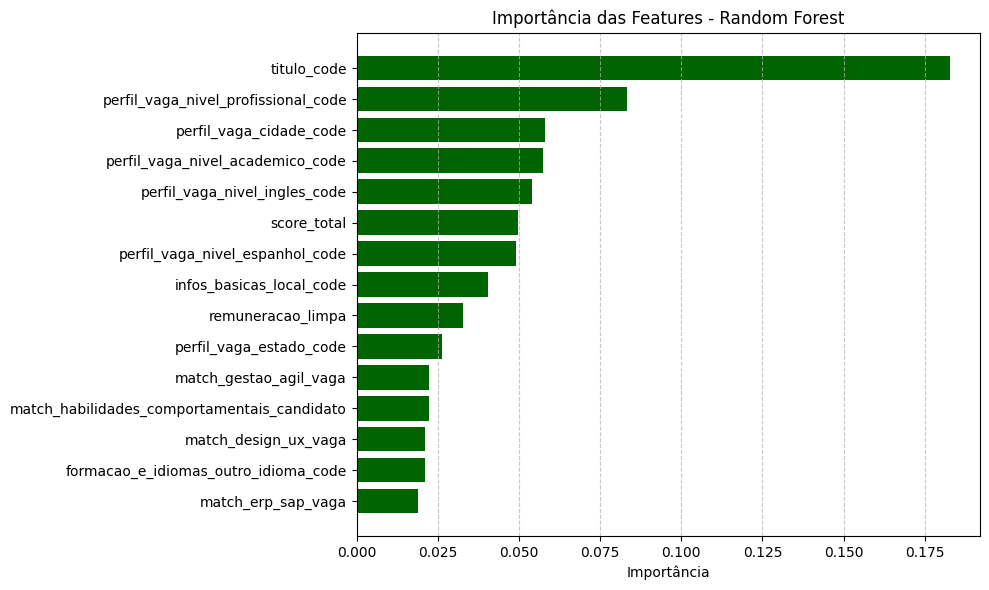

In [213]:
top_n = 15
top_features = importancias.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_features['feature'], top_features['importancia'], color='darkgreen')
plt.xlabel("Importância")
plt.title("Importância das Features - Random Forest")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Joblib

In [80]:
from sklearn.base import BaseEstimator, TransformerMixin

class BooleanConverter(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None):
        self.cols = cols
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        for col in self.cols:
            X[col] = X[col].astype(bool)
        return X

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11992 entries, 0 to 11991
Data columns (total 49 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id_vaga                                       11992 non-null  int64  
 1   titulo                                        11992 non-null  object 
 2   situacao_candidato                            11992 non-null  object 
 3   perfil_vaga_pais                              11988 non-null  object 
 4   perfil_vaga_estado                            11979 non-null  object 
 5   perfil_vaga_cidade                            11939 non-null  object 
 6   perfil_vaga_vaga_especifica_para_pcd          10468 non-null  object 
 7   perfil_vaga_nivel profissional                11988 non-null  object 
 8   perfil_vaga_nivel_academico                   11988 non-null  object 
 9   perfil_vaga_nivel_ingles                      11988 non-null 

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import joblib

# Colunas categóricas (adicione as corretas do seu conjunto)
colunas_categoricas = [
    'perfil_vaga_pais', 'perfil_vaga_estado', 'perfil_vaga_cidade', 'titulo',
    'perfil_vaga_nivel profissional', 'perfil_vaga_nivel_academico', 'perfil_vaga_nivel_ingles',
    'perfil_vaga_nivel_espanhol', 'perfil_vaga_outro_idioma',
    'informacoes_profissionais_nivel_profissional',
    'formacao_e_idiomas_nivel_academico', 'formacao_e_idiomas_nivel_ingles',
    'formacao_e_idiomas_nivel_espanhol', 'formacao_e_idiomas_outro_idioma',
    'infos_basicas_local'
]

bool_cols = ['perfil_vaga_vaga_especifica_para_pcd', 'possui_certificacao']


# Separar variáveis
X = data.drop(columns=['match', 'id_candidato'])
y = data['match'].astype(int)

# Treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pré-processador para colunas categóricas
preprocessador = ColumnTransformer([
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), colunas_categoricas)
], remainder='passthrough')

# Pipeline completo
pipeline = Pipeline([
    ('bool_converter', BooleanConverter(cols=bool_cols)),
    ('preprocessador', preprocessador),
    ('balanceador', SMOTE(random_state=42)),
    ('modelo', RandomForestClassifier(random_state=42))
])

# Treinamento
pipeline.fit(X_train, y_train)

# Previsão
y_pred = pipeline.predict(X_test)

# Avaliação
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Salvar tudo no joblib
joblib.dump(pipeline, 'modelo_rf_completo.joblib')


ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [14]:
data['perfil_vaga_vaga_especifica_para_pcd'] = data['perfil_vaga_vaga_especifica_para_pcd'].fillna(False).astype(bool)
data['possui_certificacao'] = data['possui_certificacao'].fillna(False).astype(bool)

In [15]:
data['perfil_vaga_nivel_espanhol'] = data['perfil_vaga_nivel_espanhol'].fillna('Não informado')

In [16]:
colunas_categoricas_com_nulos = [
    'infos_basicas_local',
    'perfil_vaga_cidade',
    'perfil_vaga_estado',
    'perfil_vaga_nivel profissional',
    'perfil_vaga_nivel_academico',
    'perfil_vaga_nivel_ingles',
    'perfil_vaga_pais'
]

for col in colunas_categoricas_com_nulos:
    data[col] = data[col].fillna('Não informado')


In [18]:
from utils.processing import BooleanConverter

ModuleNotFoundError: No module named 'utils'

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline as SklearnPipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import joblib


# === 2. Definindo colunas ===
colunas_booleans = ['perfil_vaga_vaga_especifica_para_pcd', 'possui_certificacao']
colunas_numericas = ['remuneracao_limpa']  # adicione outras se houver
colunas_categoricas = [
    'perfil_vaga_pais', 'perfil_vaga_estado', 'perfil_vaga_cidade', 'titulo',
    'perfil_vaga_nivel profissional', 'perfil_vaga_nivel_academico', 'perfil_vaga_nivel_ingles',
    'perfil_vaga_nivel_espanhol', 'perfil_vaga_outro_idioma',
    'informacoes_profissionais_nivel_profissional',
    'formacao_e_idiomas_nivel_academico', 'formacao_e_idiomas_nivel_ingles',
    'formacao_e_idiomas_nivel_espanhol', 'formacao_e_idiomas_outro_idioma',
    'infos_basicas_local'
]

# === 3. Pré-processador com imputação e encoding ===
preprocessador = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), colunas_numericas),
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), colunas_categoricas),
    ('bool', 'passthrough', colunas_booleans)
], remainder='drop')

# === 4. Pipeline completo ===
pipeline = Pipeline([
    ('bool_converter', BooleanConverter(cols=colunas_booleans)),
    ('preprocessamento', preprocessador),
    ('balanceamento', SMOTE(random_state=42)),
    ('modelo', RandomForestClassifier(random_state=42))
])

# === 5. Separar dados e treinar ===
X = data.drop(columns=['match', 'id_candidato'])  # ajusta se precisar
y = data['match'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# === 6. Avaliação ===
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# === 7. Salvar modelo completo ===
joblib.dump(pipeline, 'modelo_rf_completo.joblib')


Acurácia: 0.7709838799332963

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85      2685
           1       0.55      0.50      0.52       913

    accuracy                           0.77      3598
   macro avg       0.69      0.68      0.69      3598
weighted avg       0.76      0.77      0.77      3598



['modelo_rf_completo.joblib']

In [95]:
X_train.isnull().sum().sort_values(ascending=False)


remuneracao_limpa                               6317
titulo                                             0
match_mainframe_legado_candidato                   0
match_banco_dados_vaga                             0
match_devops_infra_candidato                       0
match_devops_infra_vaga                            0
match_bi_dados_candidato                           0
match_bi_dados_vaga                                0
match_erp_sap_candidato                            0
match_erp_sap_vaga                                 0
match_mainframe_legado_vaga                        0
match_frontend_vaga                                0
match_design_ux_candidato                          0
match_design_ux_vaga                               0
match_gestao_agil_candidato                        0
match_gestao_agil_vaga                             0
match_ciencia_dados_ia_candidato                   0
match_ciencia_dados_ia_vaga                        0
match_habilidades_comportamentais_candidato   

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
import joblib